In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [18]:
# 폰트설정 (맥)
from matplotlib import font_manager
plt.rcParams["font.family"] = 'NanumGothicCoding'
from matplotlib import rc
rc('font', family="Arial Unicode MS")

In [4]:
# 폰트 설정 (윈도우)
from matplotlib import rc

rc('font', family='Malgun Gothic')

# Data 불러오기

## 부동산(Train) Data

 <img src="./datas/data_source.png" style="width:100%;">

 <img src="./datas/csv.png" style="width:100%;">

In [5]:
train = pd.read_csv('datas/train.csv')

In [6]:
train['P/m^2'] = train['transaction_real_price']/train['exclusive_use_area'] # 평당가격 column 추가

In [7]:
train['year'] =  pd.to_datetime(train['transaction_year_month'], format="%Y%m").apply(lambda x: str(x).split("-")[0])
train['month'] = pd.to_datetime(train['transaction_year_month'], format="%Y%m").apply(lambda x: str(x).split("-")[1])

In [8]:
train = train[['transaction_id', 'apartment_id', 'city',  'dong', 'jibun', 'apt',
               'addr_kr', 'exclusive_use_area', 'year_of_completion',
               'transaction_year_month','year', 'month', 'transaction_date', 'floor', 'P/m^2',
               'transaction_real_price']]

In [9]:
train.head()

transaction_id  apartment_id   city dong   jibun       apt  \
0               0          7622  서울특별시  신교동    6-13  신현(101동)   
1               1          5399  서울특별시  필운동     142    사직파크맨션   
2               2          3578  서울특별시  필운동   174-1    두레엘리시안   
3               3         10957  서울특별시  내수동      95     파크팰리스   
4               4         10639  서울특별시  내수동  110-15      킹스매너   

             addr_kr  exclusive_use_area  year_of_completion  \
0  신교동 6-13 신현(101동)               84.82                2002   
1     필운동 142 사직파크맨션               99.17                1973   
2   필운동 174-1 두레엘리시안               84.74                2007   
3       내수동 95 파크팰리스              146.39                2003   
4    내수동 110-15 킹스매너              194.43                2004   

   transaction_year_month  year month transaction_date  floor       P/m^2  \
0                  200801  2008    01            21~31      2  442.112709   
1                  200801  2008    01             1~10      6  201.673893   
2                  200801  2008    01             1~10      6  454.330895   
3                  200801  2008    01            11~20     15  806.065988   
4                  200801  2008    01            21~31      3  617.188705   

   transaction_real_price  
0                   37500  
1                   20000  
2                   38500  
3                  118000  
4                  120000

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  year                    1216553 non-null  object 
 11  month                   1216553 non-null  object 
 12  transaction_date        1216553 non-null  object 
 13  floor                   1216553 non-null  int64  
 14  P/

## 공원 Data

In [11]:
park = pd.read_csv('datas/park.csv')
park.tail(50)

city   gu  dong   park_name park_type  park_area  \
1309  부산광역시  사상구   모라동    모라벤처타워공원       소공원      735.8   
1310  부산광역시  사상구   주례동        주감공원       소공원     1250.0   
1311  부산광역시  사상구   덕포동        문화공원      문화공원     3160.0   
1312  서울특별시  구로구  신도림동   미래사랑어린이공원     어린이공원     5870.0   
1313  서울특별시  구로구  신도림동    신도림역문화공원      문화공원     3322.0   
1314  서울특별시  구로구  신도림동    신도림어린이공원     어린이공원     2292.0   
1315  서울특별시  구로구   구로동     희망어린이공원     어린이공원      911.0   
1316  서울특별시  구로구   구로동    꿈마을어린이공원     어린이공원     1609.0   
1317  서울특별시  구로구   구로동    구로리어린이공원     어린이공원     7782.0   
1318  서울특별시  구로구   구로동     솔길어린이공원     어린이공원     1999.0   
1319  서울특별시  구로구   구로동     화원어린이공원     어린이공원     4544.0   
1320  서울특별시  구로구   구로동     삼각어린이공원     어린이공원     2634.0   
1321  서울특별시  구로구   구로동      구로근린공원      근린공원     7901.0   
1322  서울특별시  구로구   구로동     환경어린이공원     어린이공원      528.0   
1323  서울특별시  구로구   구로동     애경어린이공원     어린이공원     2996.0   
1324  서울특별시  구로구   구로동     테크노근린공원      근린공원    10482.0   
1325  서울특별시  구로구   구로동  구로동(다울)소공원       소공원      243.0   
1326  서울특별시  구로구   고척동    도레미어린이공원     어린이공원      326.0   
1327  서울특별시  구로구   고척동      계남근린공원      근린공원   158814.0   
1328  서울특별시  구로구   고척동      고척근린공원      근린공원   108120.0   
1329  서울특별시  구로구   고척동     골목어린이공원     어린이공원      266.0   
1330  서울특별시  구로구   고척동     능골어린이공원     어린이공원      357.0   
1331  서울특별시  구로구   고척동     오금어린이공원     어린이공원      348.0   
1332  서울특별시  구로구   고척동      덕의근린공원      근린공원     5565.0   
1333  서울특별시  구로구   고척동       현화소공원       소공원      720.0   
1334  서울특별시  구로구   고척동      무궁화소공원       소공원     1166.0   
1335  서울특별시  구로구   개봉동     개웅어린이공원     어린이공원     1797.0   
1336  서울특별시  구로구   개봉동    소막골어린이공원     어린이공원      516.0   
1337  서울특별시  구로구   개봉동     절골어린이공원     어린이공원      369.0   
1338  서울특별시  구로구   개봉동    가린열어린이공원     어린이공원      333.0   
1339  서울특별시  구로구   개봉동       개봉소공원       소공원     3023.0   
1340  서울특별시  구로구   개봉동       개웅소공원       소공원      657.0   
1341  서울특별시  구로구   오류동    온수도시자연공원        기타  1097565.0   
1342  서울특별시  구로구   오류동     개웅산근린공원      근린공원   411972.0   
1343  서울특별시  구로구   오류동   오동나무어린이공원     어린이공원     1815.0   
1344  서울특별시  구로구   온수동     온수어린이공원     어린이공원      475.0   
1345  서울특별시  구로구   온수동       와룡소공원       소공원     2500.0   
1346  서울특별시  구로구   온수동       갈매소공원       소공원     3200.0   
1347  서울특별시  구로구    궁동     삭새어린이공원     어린이공원     2077.0   
1348  서울특별시  구로구    궁동     수른어린이공원     어린이공원      332.0   
1349  서울특별시  구로구   천왕동    천왕도시자연공원        기타   587860.0   
1350  서울특별시  구로구   천왕동      연지근린공원      근린공원    44478.0   
1351  서울특별시  구로구   천왕동     버들어린이공원     어린이공원     6167.0   
1352  서울특별시  구로구   천왕동      천왕근린공원      근린공원    33677.0   
1353  서울특별시  구로구   천왕동      천왕역소공원       소공원     1712.0   
1354  서울특별시  구로구   천왕동   이펜시아어린이공원     어린이공원     1500.0   
1355  서울특별시  구로구   천왕동       개명소공원       소공원     5415.0   
1356  서울특별시  구로구   천왕동     봉화대근린공원      근린공원    60975.0   
1357  서울특별시  구로구    항동       푸른수목원      근린공원   100809.0   
1358  서울특별시  구로구   오류동    오류동역문화공원      문화공원     7510.0   

                                 park_exercise_facility  \
1309                                                NaN   
1310                                                NaN   
1311                                                NaN   
1312                                          체력단련시설 5점   
1313                                                NaN   
1314                                          체력단련시설 6점   
1315                                          체력단련시설 3점   
1316                                          체력단련시설 6점   
1317                                          체력단련시설 9점   
1318                                          체력단련시설 5점   
1319                                          체력단련시설 5점   
1320                                          체력단련시설 3점   
1321                                          체력단련시설 5점   
1322                                          체력단련시설 2점   
1323                                          체력단련시설 6점   
1324                                          체력단련시설 

In [12]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

## 어린이집 Data

In [13]:
day_care = pd.read_csv('datas/day_care_center.csv')
day_care.tail()

city   gu day_care_name day_care_type  day_care_baby_num  teacher_num  \
7546  부산광역시  금정구      해바라기어린이집            민간                 46         13.0   
7547  부산광역시  금정구        해수어린이집            가정                 19          6.0   
7548  부산광역시  금정구   행복한그림동산어린이집            민간                 92         16.0   
7549  부산광역시  금정구       행복한어린이집            민간                 43         12.0   
7550  부산광역시  금정구        혜인어린이집            민간                 32          7.0   

      nursing_room_num  playground_num  CCTV_num is_commuting_vehicle  \
7546               NaN             NaN       NaN                    y   
7547               NaN             NaN       NaN                    y   
7548               NaN             NaN       NaN                    y   
7549               NaN             NaN       NaN                    y   
7550               NaN             NaN       NaN                    y   

     reference_date  
7546     2019-01-21  
7547     2019-01-21  
7548     2019-01-21  
7549     2019-01-21  
7550     2019-01-21

In [14]:
day_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


## 동별 실가격 정보 내림차순으로 정렬

In [30]:
df1 = pd.DataFrame(train, columns=['city', 'dong', 'transaction_real_price','transaction_id','apartment_id','jibun',
                                  'apt','addr_kr', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month',
                                   'year','month','transaction_date', 'floor', 'P/m^2'])

In [31]:
city_dong_data = df1["transaction_real_price"].groupby([df1['city'], df1['dong']]).agg(['count'])

city_dong_data_sort = ((city_dong_data['count'].sort_values(ascending=False)).reset_index()).head(20)

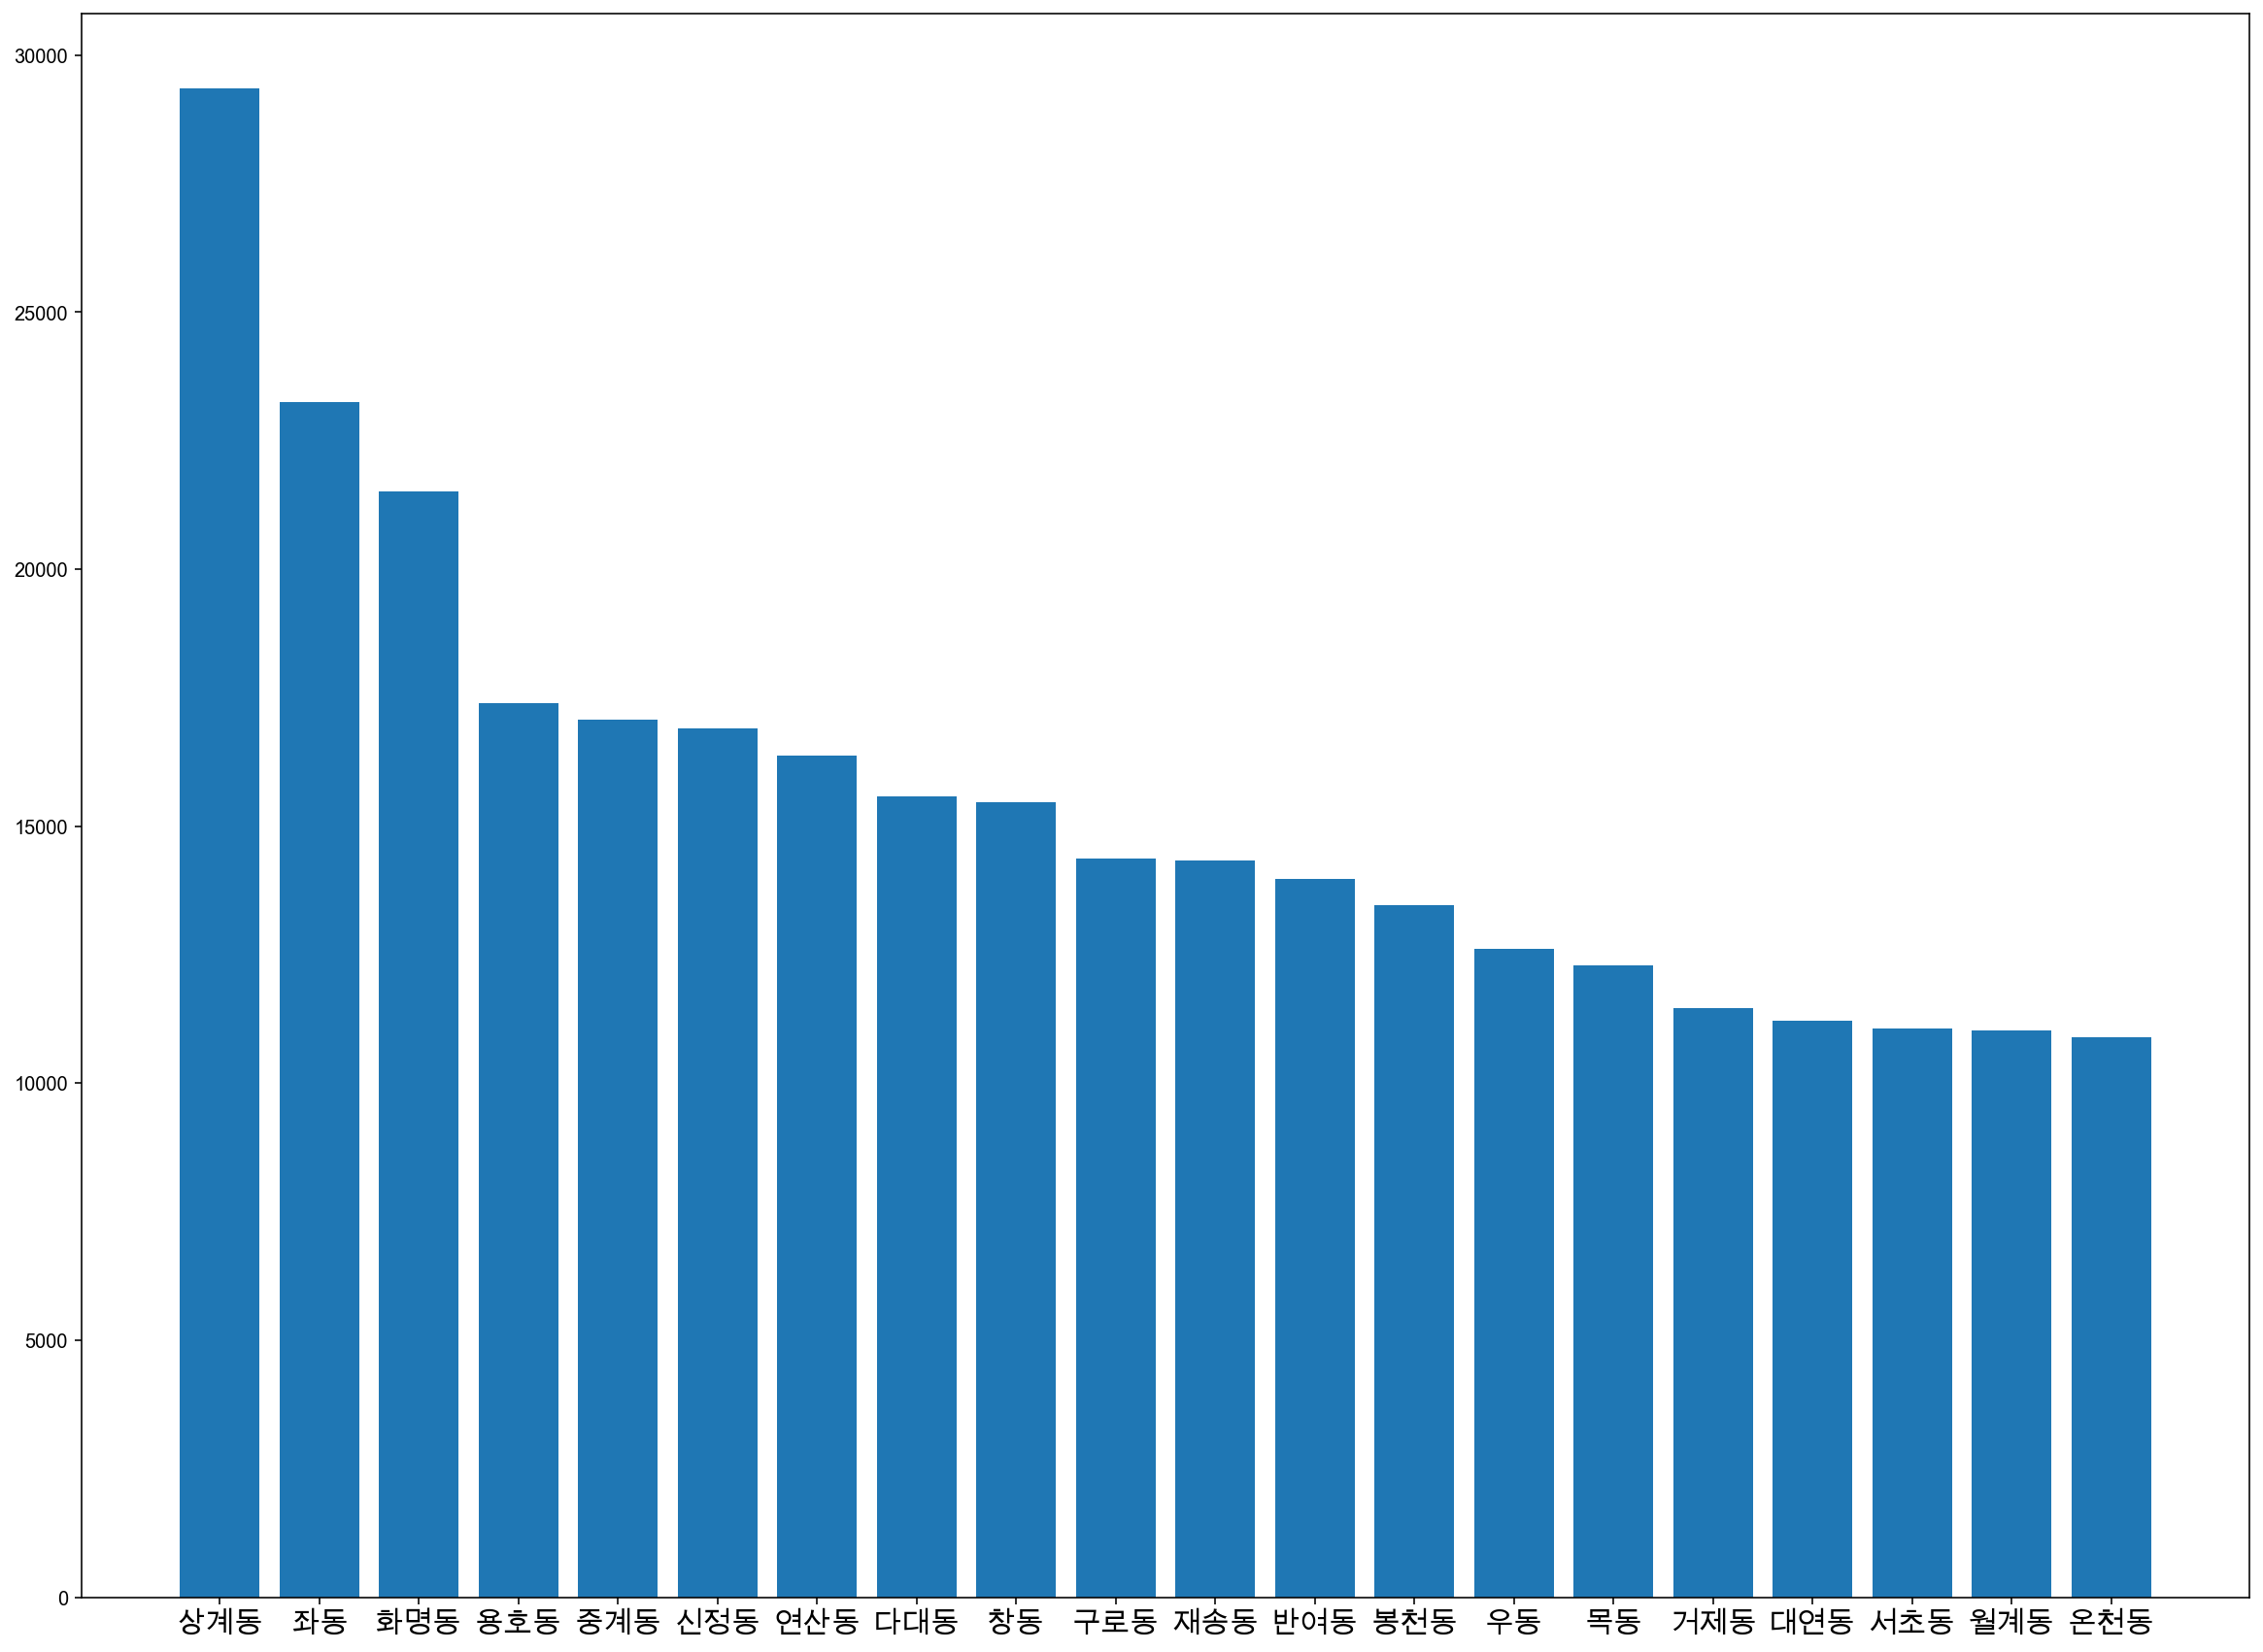

In [19]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

plt.xticks(fontsize=15)
plt.bar(city_dong_data_sort['dong'], city_dong_data_sort['count'])
plt.xticks(fontsize=15)
plt.show()

## Heatmap을 이용해 상관관계 분석

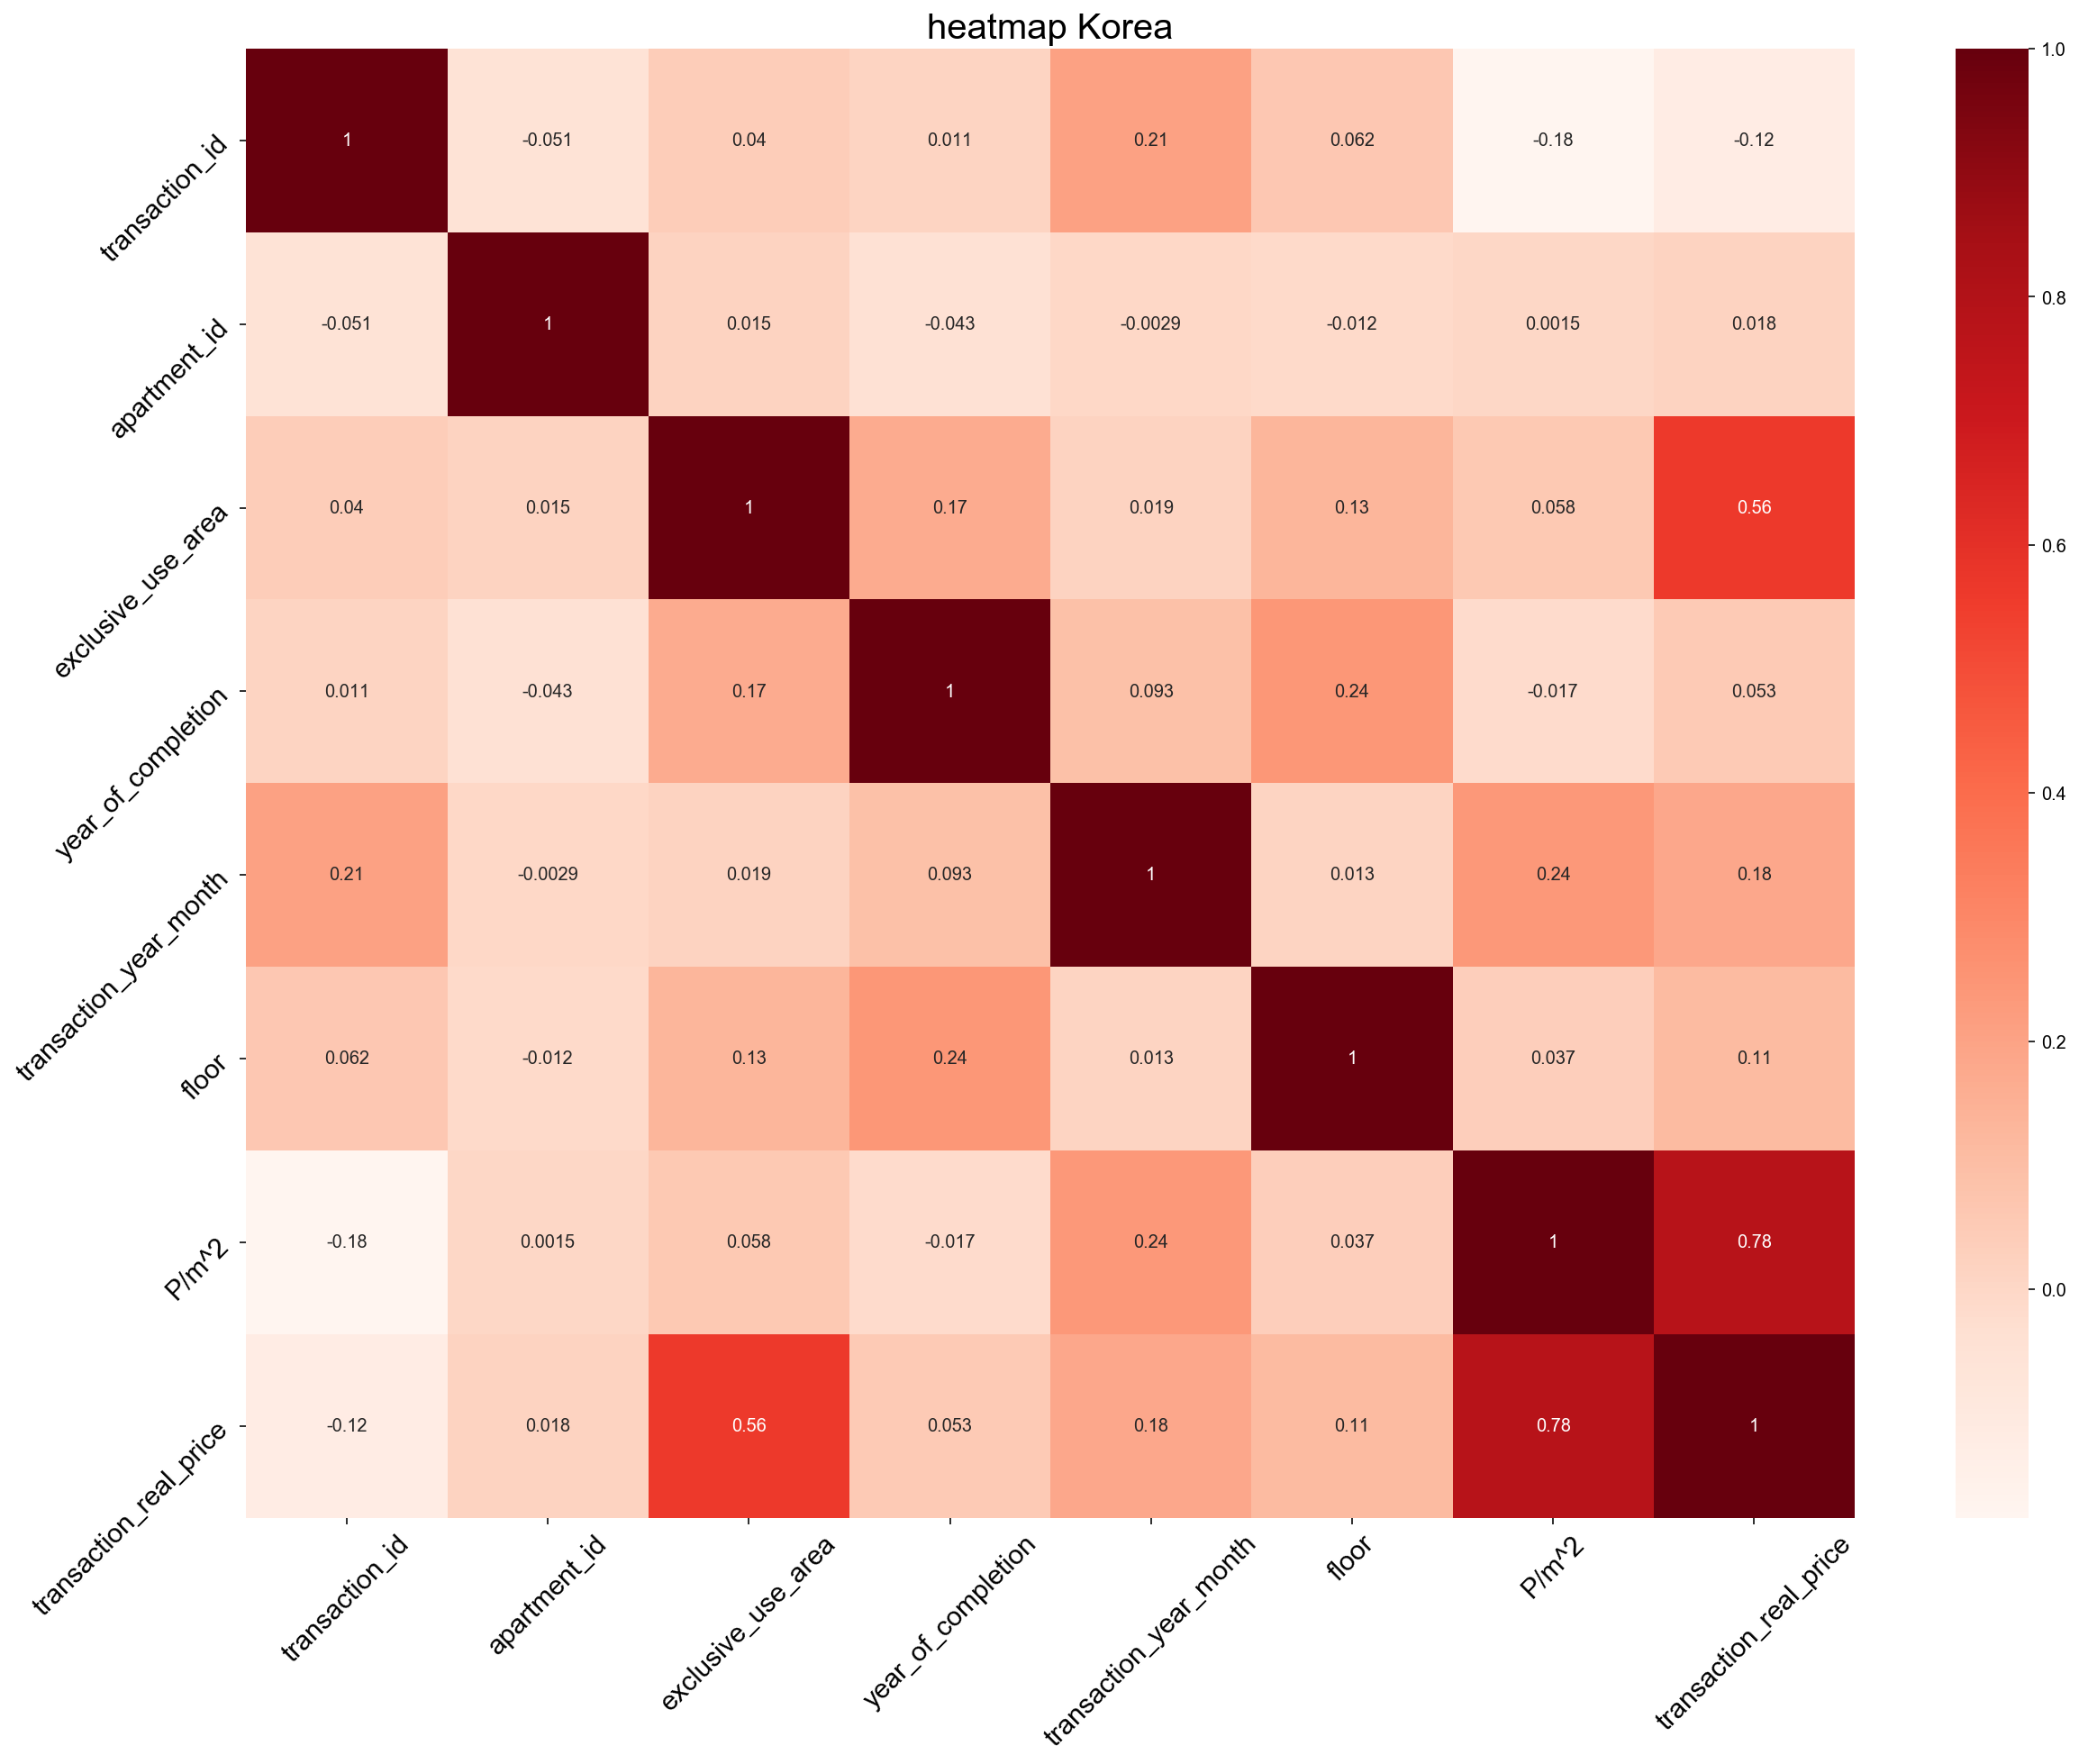

In [20]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

sns.heatmap(train.corr(), cmap="Reds", annot=True)
plt.title('heatmap Korea', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

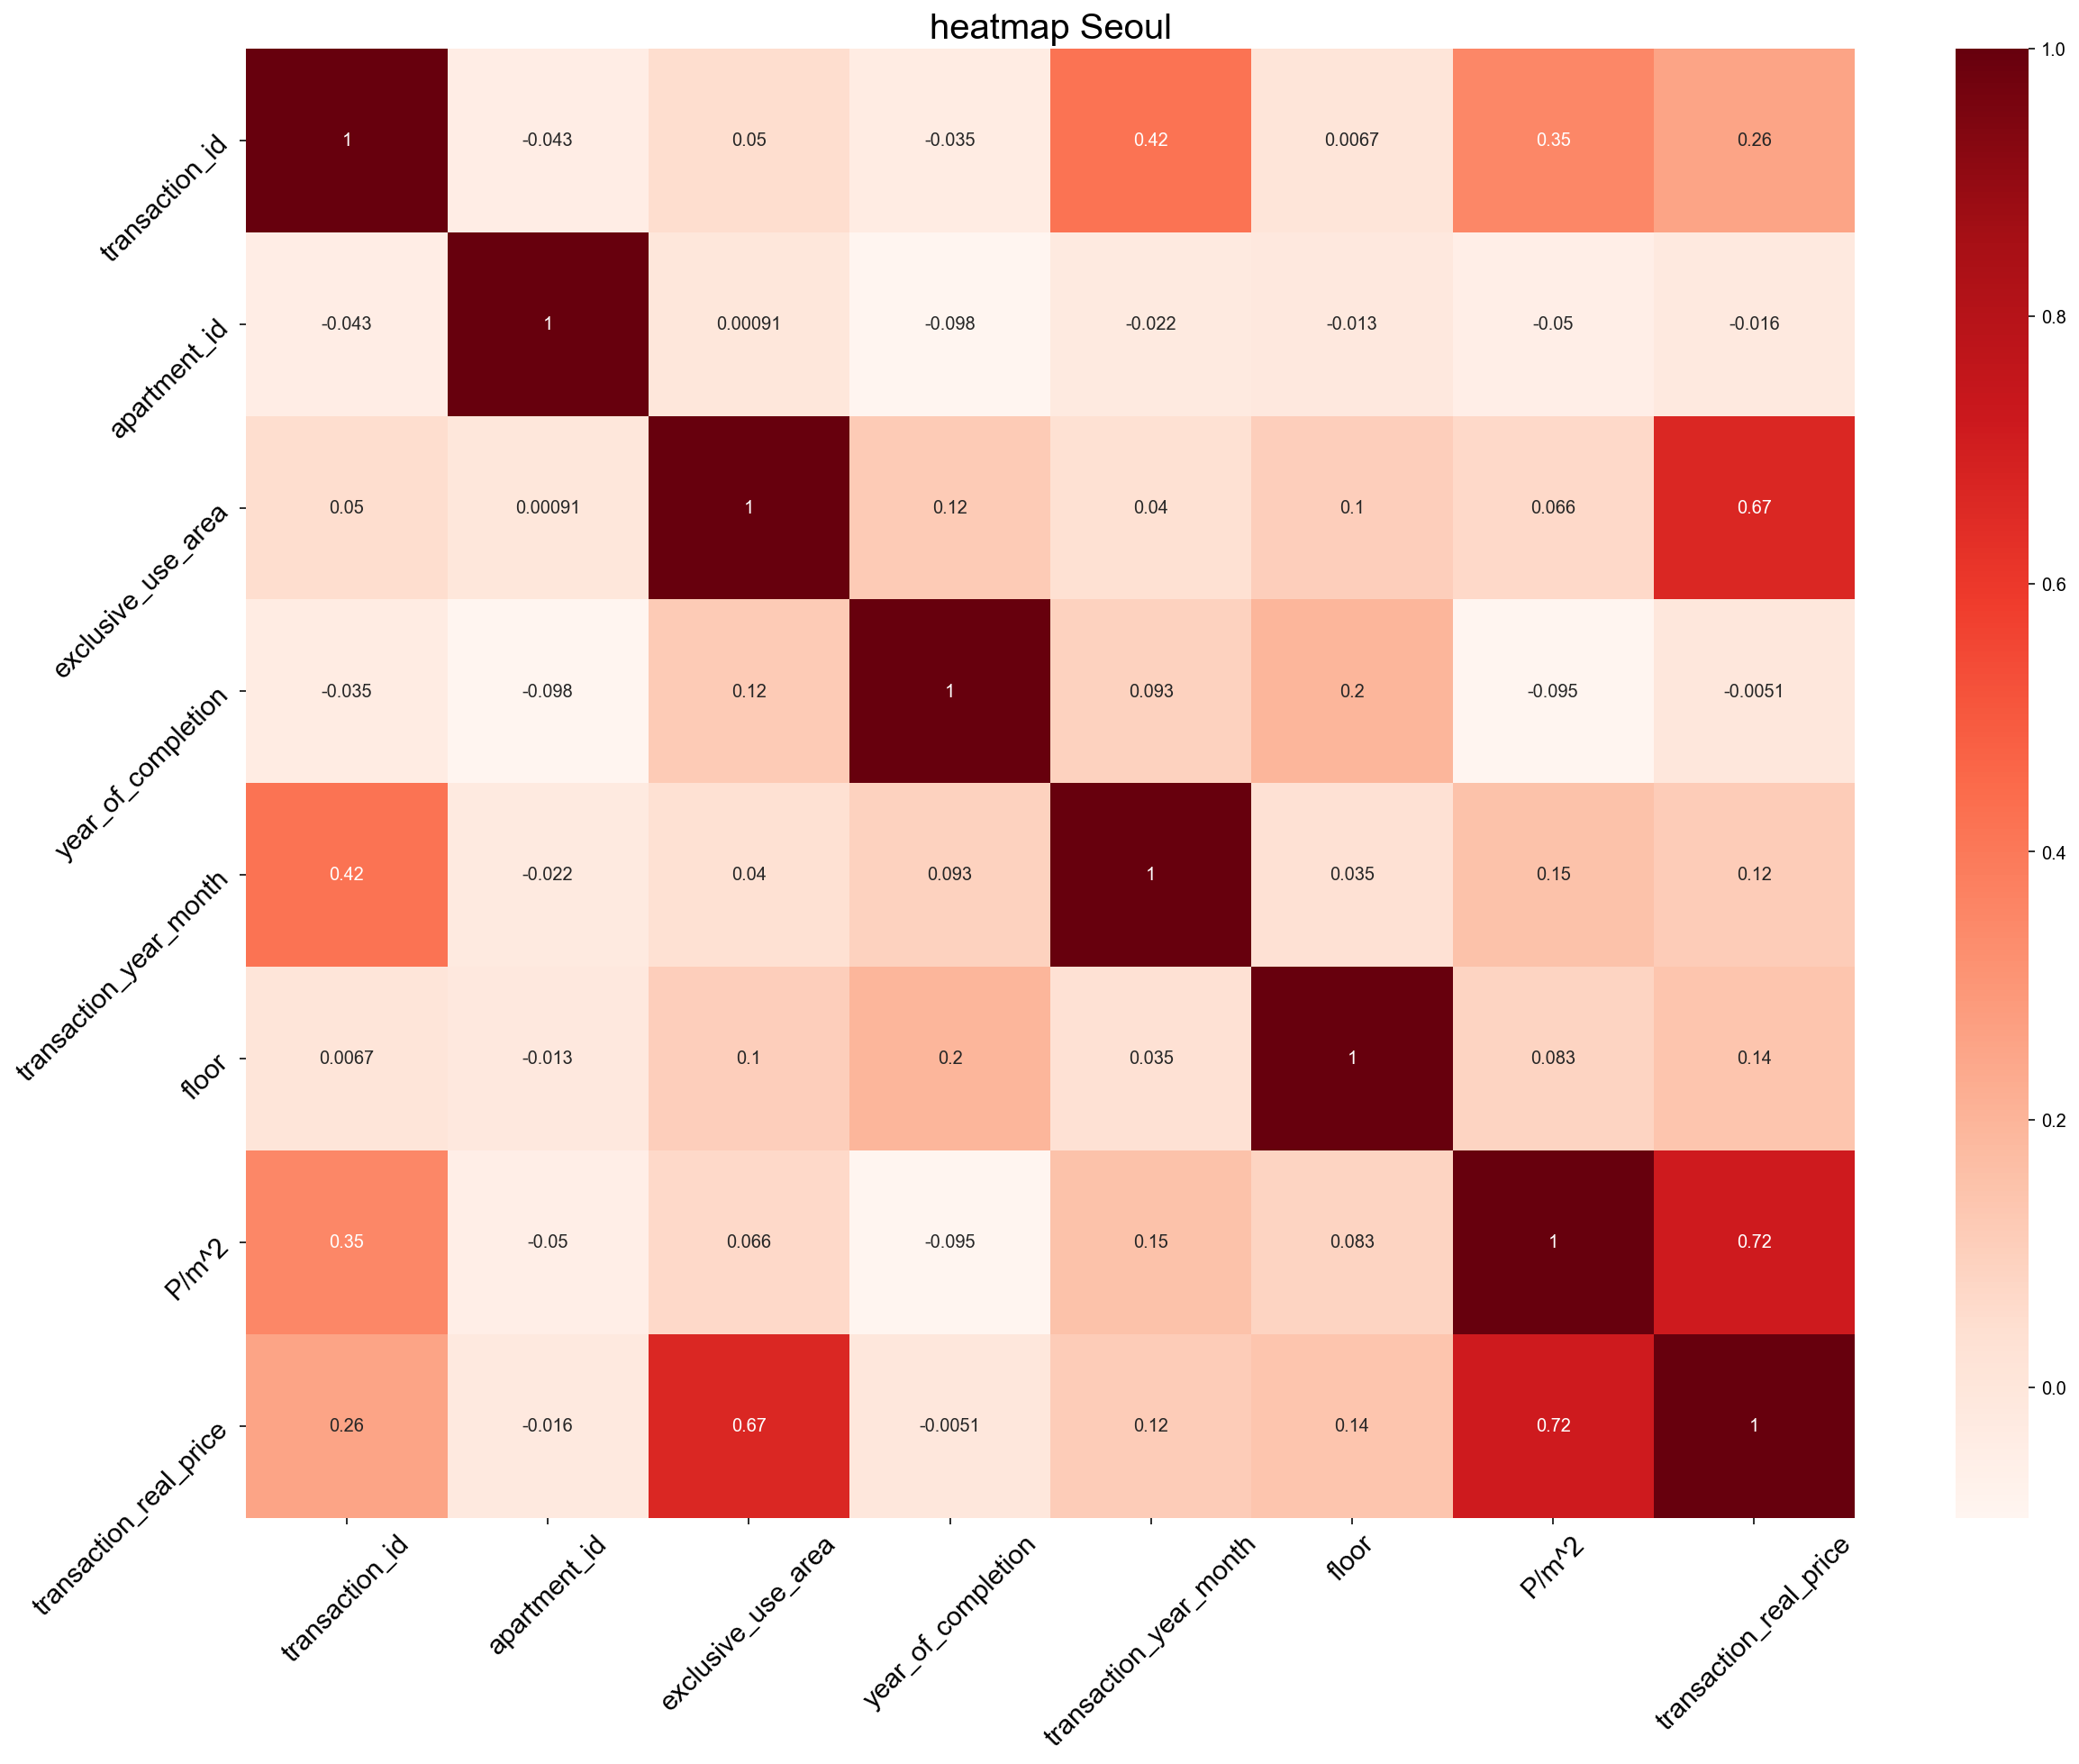

In [21]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

sns.heatmap(train[train['city'] == '서울특별시'].corr(), cmap="Reds", annot=True)
plt.title('heatmap Seoul', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

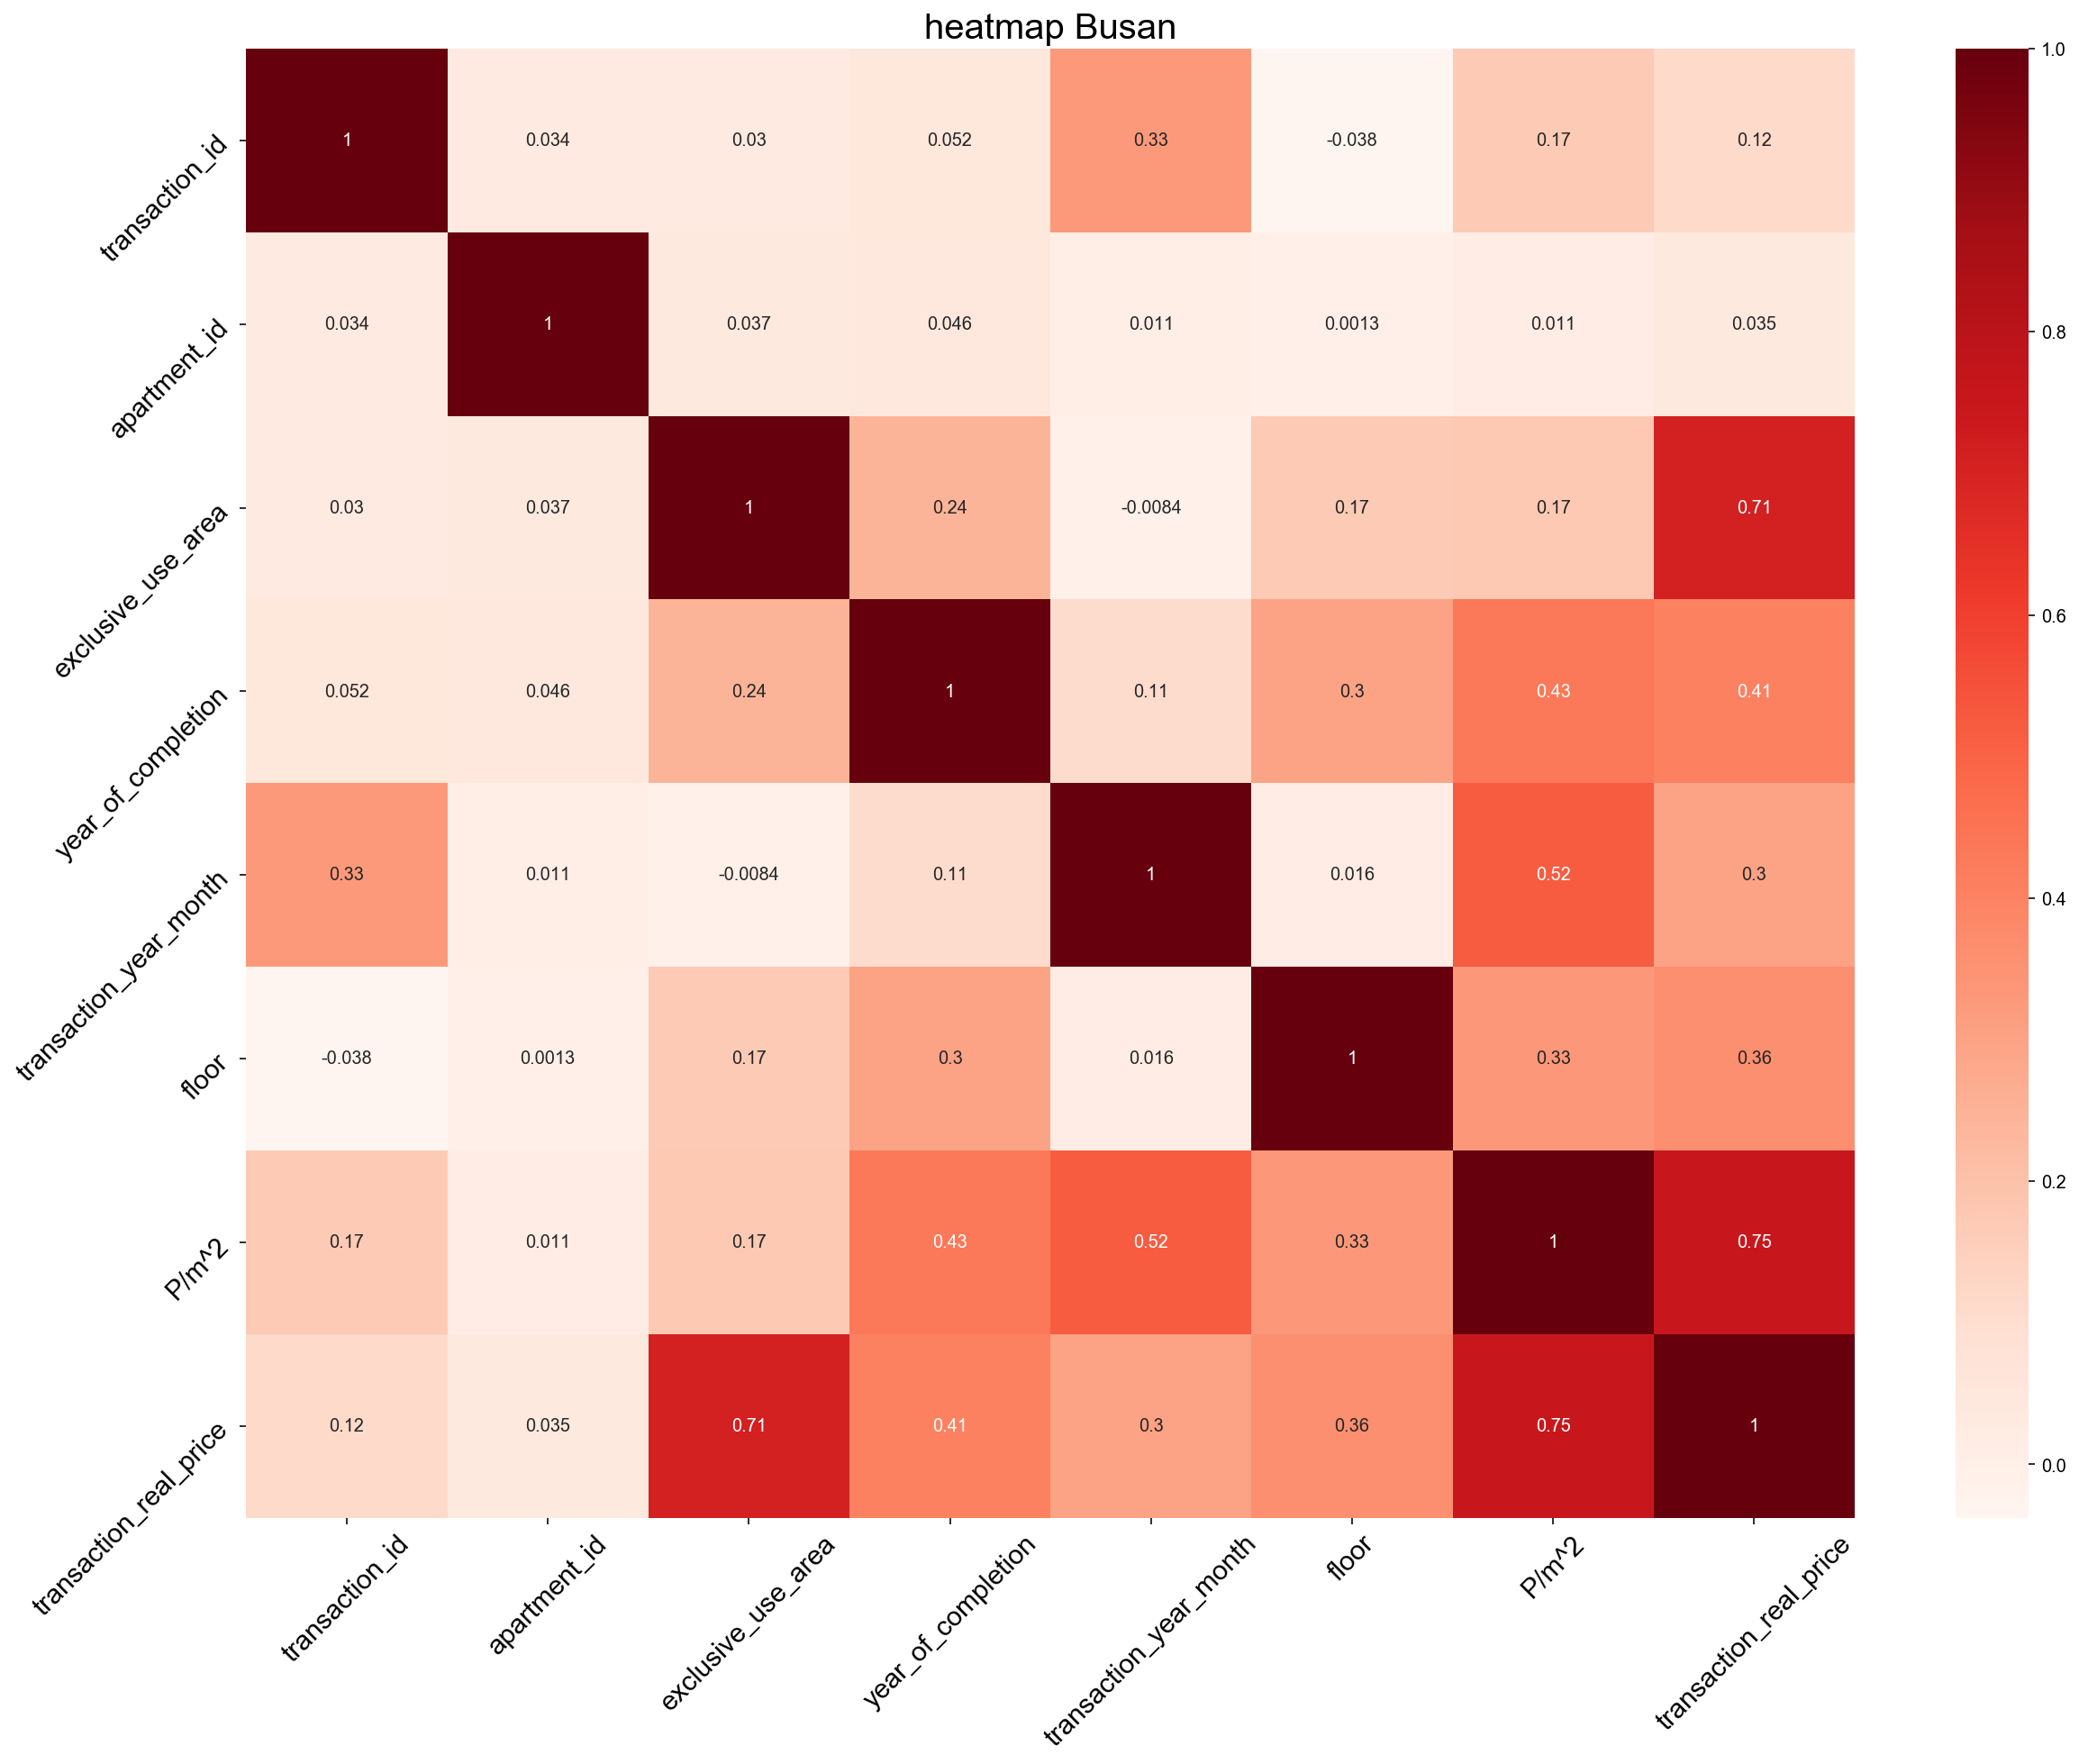

In [22]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

sns.heatmap(train[train['city'] == '부산광역시'].corr(), cmap="Reds", annot=True)
plt.title('heatmap Busan', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

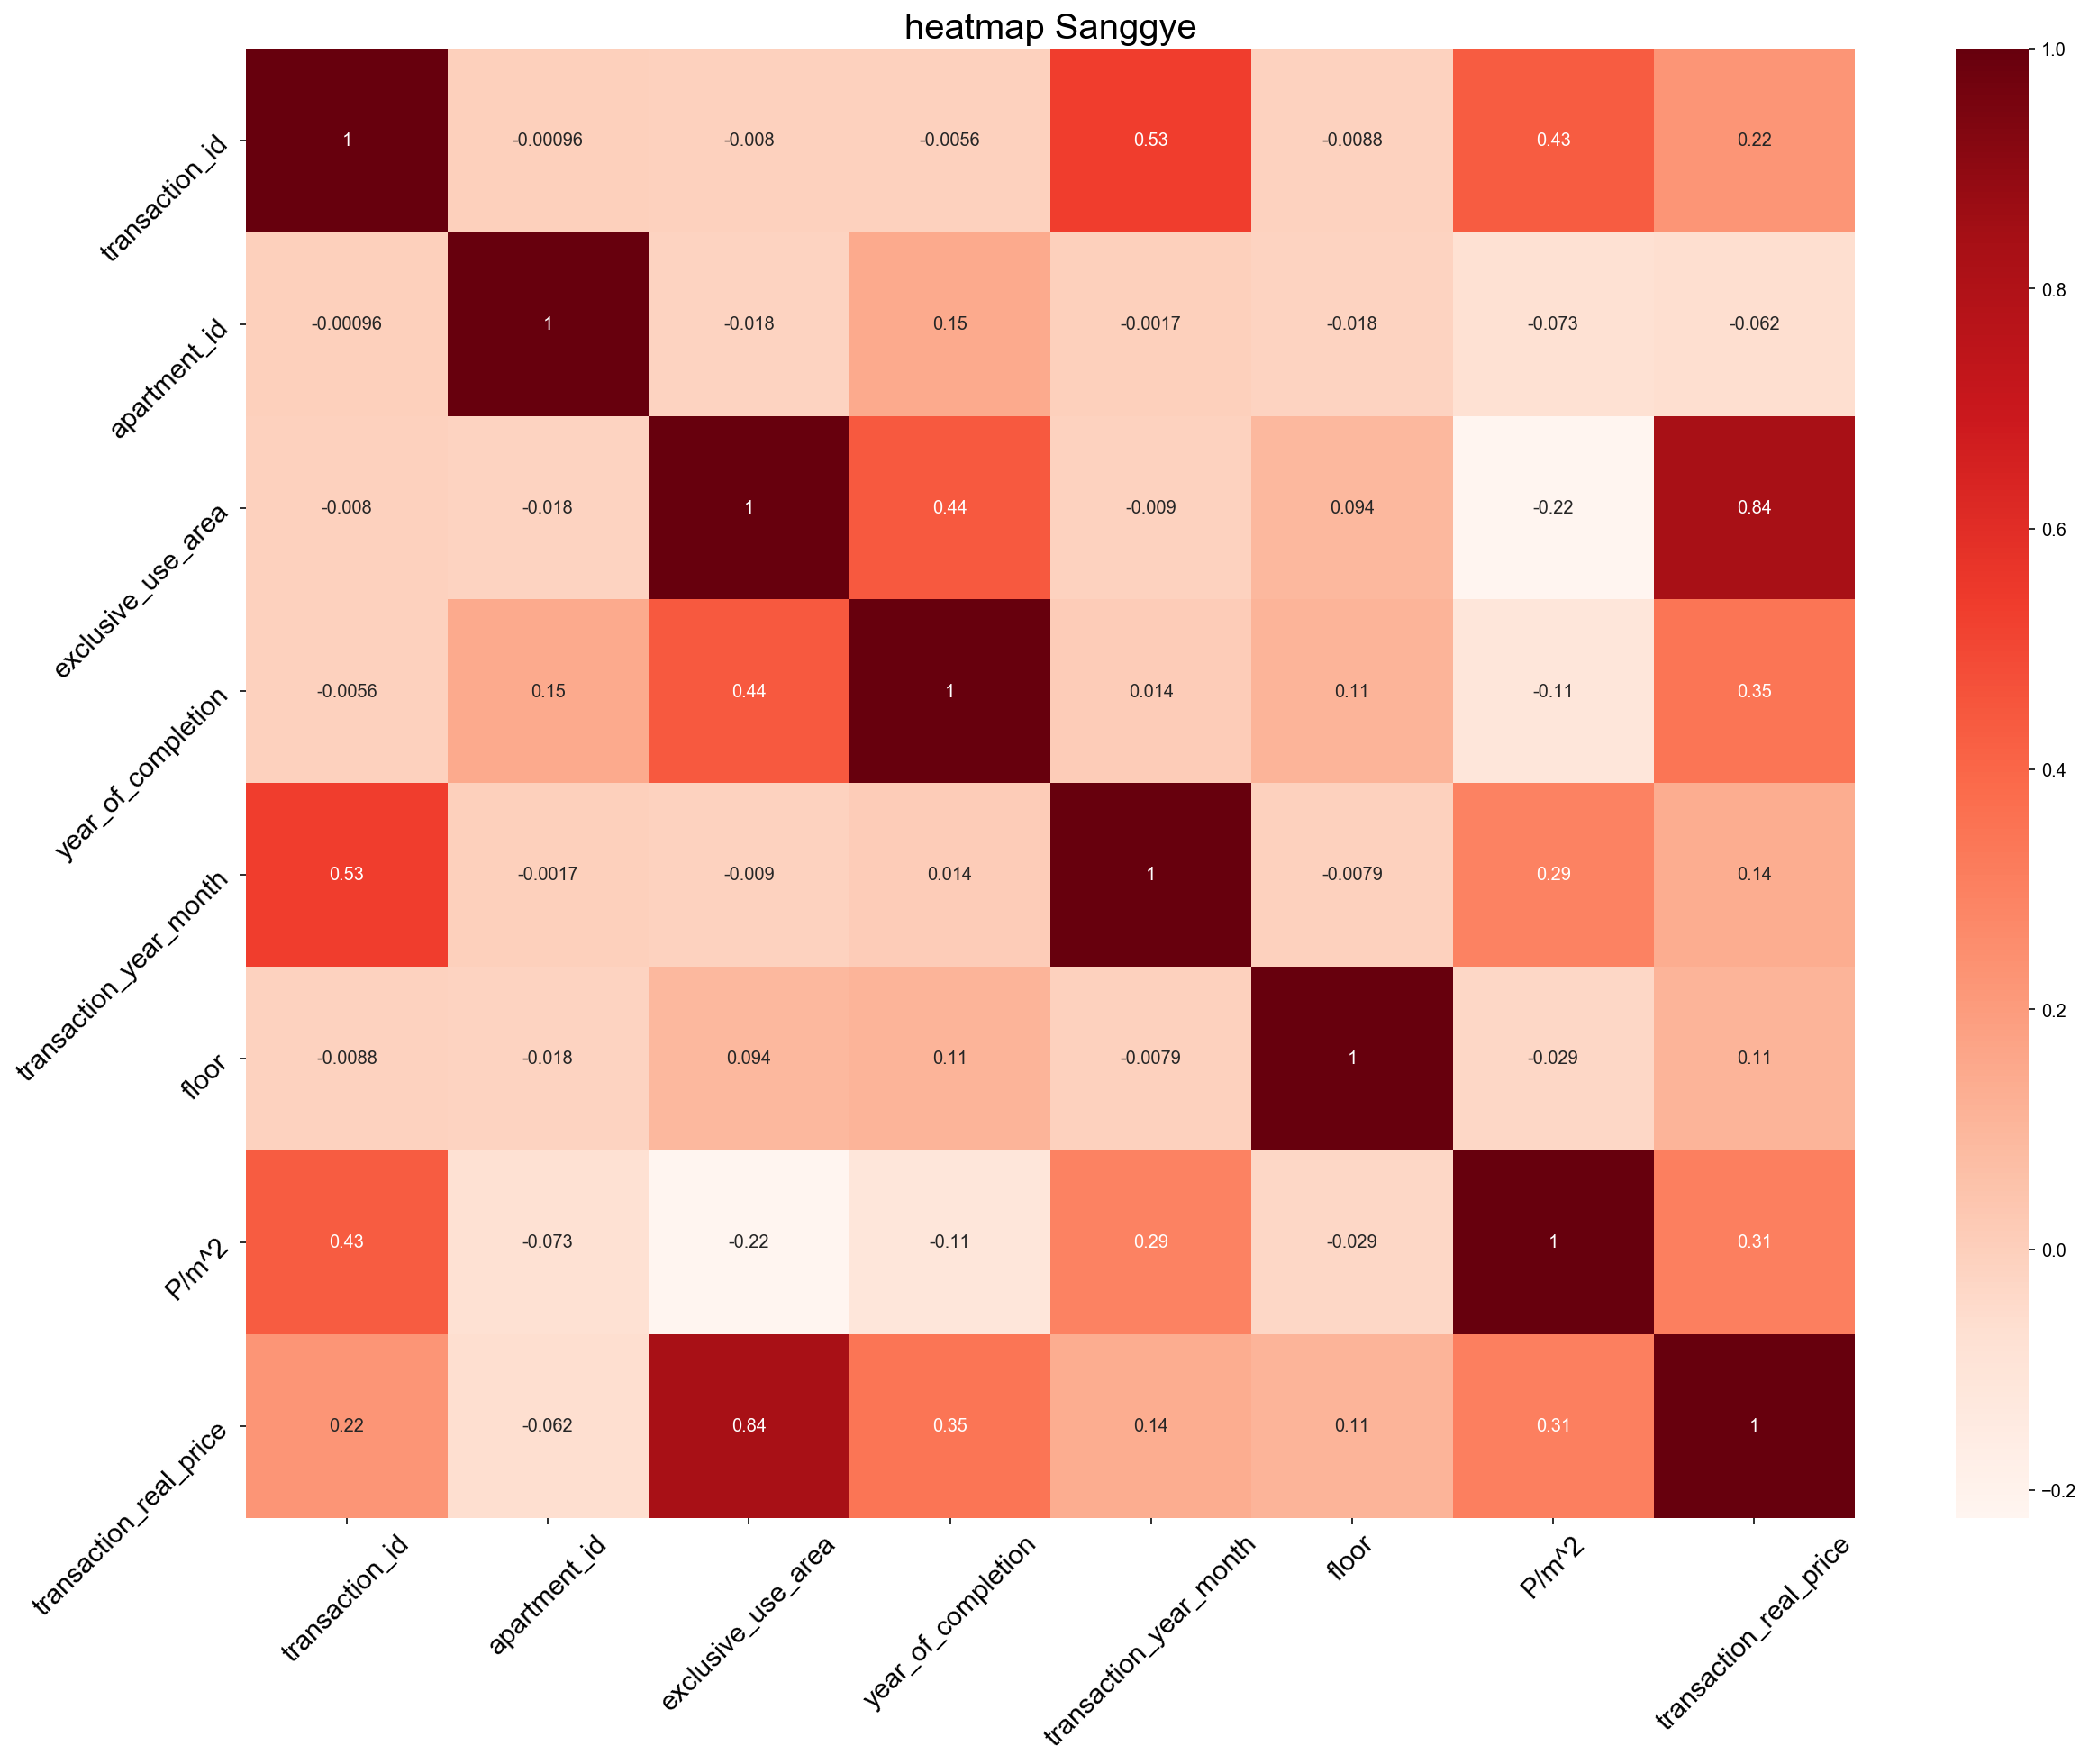

In [24]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

sns.heatmap(train[train['dong'] == '상계동'].corr(), cmap="Reds", annot=True)
plt.title('heatmap Sanggye', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

## 대략적 서울 집 값 분포를 확인해보자

In [29]:
df2 = train.groupby(["dong", "month"]).size().reset_index(name="Count")
df2 = df2.pivot("dong", "month", "Count")
df2.replace(np.NaN, 0, inplace=True)
list = []
for idx, idxn in zip(df2.index,range(len(df2.index))) :
    list.append( [idx, max(df2.loc[df2.index[idxn]]), min(df2.loc[df2.index[idxn]])])
list = pd.DataFrame(list)
list.columns = ['dong', 'max', 'min']
list['max-min'] = (list['max'] - list['min']) / list['max']
list_sort = list.sort_values(by=['max-min'], ascending=True).head(20)
list_sort

dong     max     min   max-min
100      대치동   732.0   548.0  0.251366
404      천연동    68.0    50.0  0.264706
106      도곡동   620.0   441.0  0.288710
365      잠원동   816.0   576.0  0.294118
339       우동  1252.0   875.0  0.301118
382  정관읍 용수리   506.0   352.0  0.304348
23       광장동   441.0   304.0  0.310658
167      민락동   288.0   198.0  0.312500
233      서초동  1103.0   752.0  0.318223
338      용호동  1767.0  1203.0  0.319185
77       다대동  1582.0  1073.0  0.321745
31       구서동   981.0   659.0  0.328236
0        가락동   928.0   620.0  0.331897
92       대방동   311.0   205.0  0.340836
171      방배동   691.0   455.0  0.341534
13       개포동   988.0   649.0  0.343117
158    문래동3가   154.0   101.0  0.344156
375      재송동  1491.0   966.0  0.352113
300      역삼동   591.0   380.0  0.357022
53       낙민동   397.0   254.0  0.360202

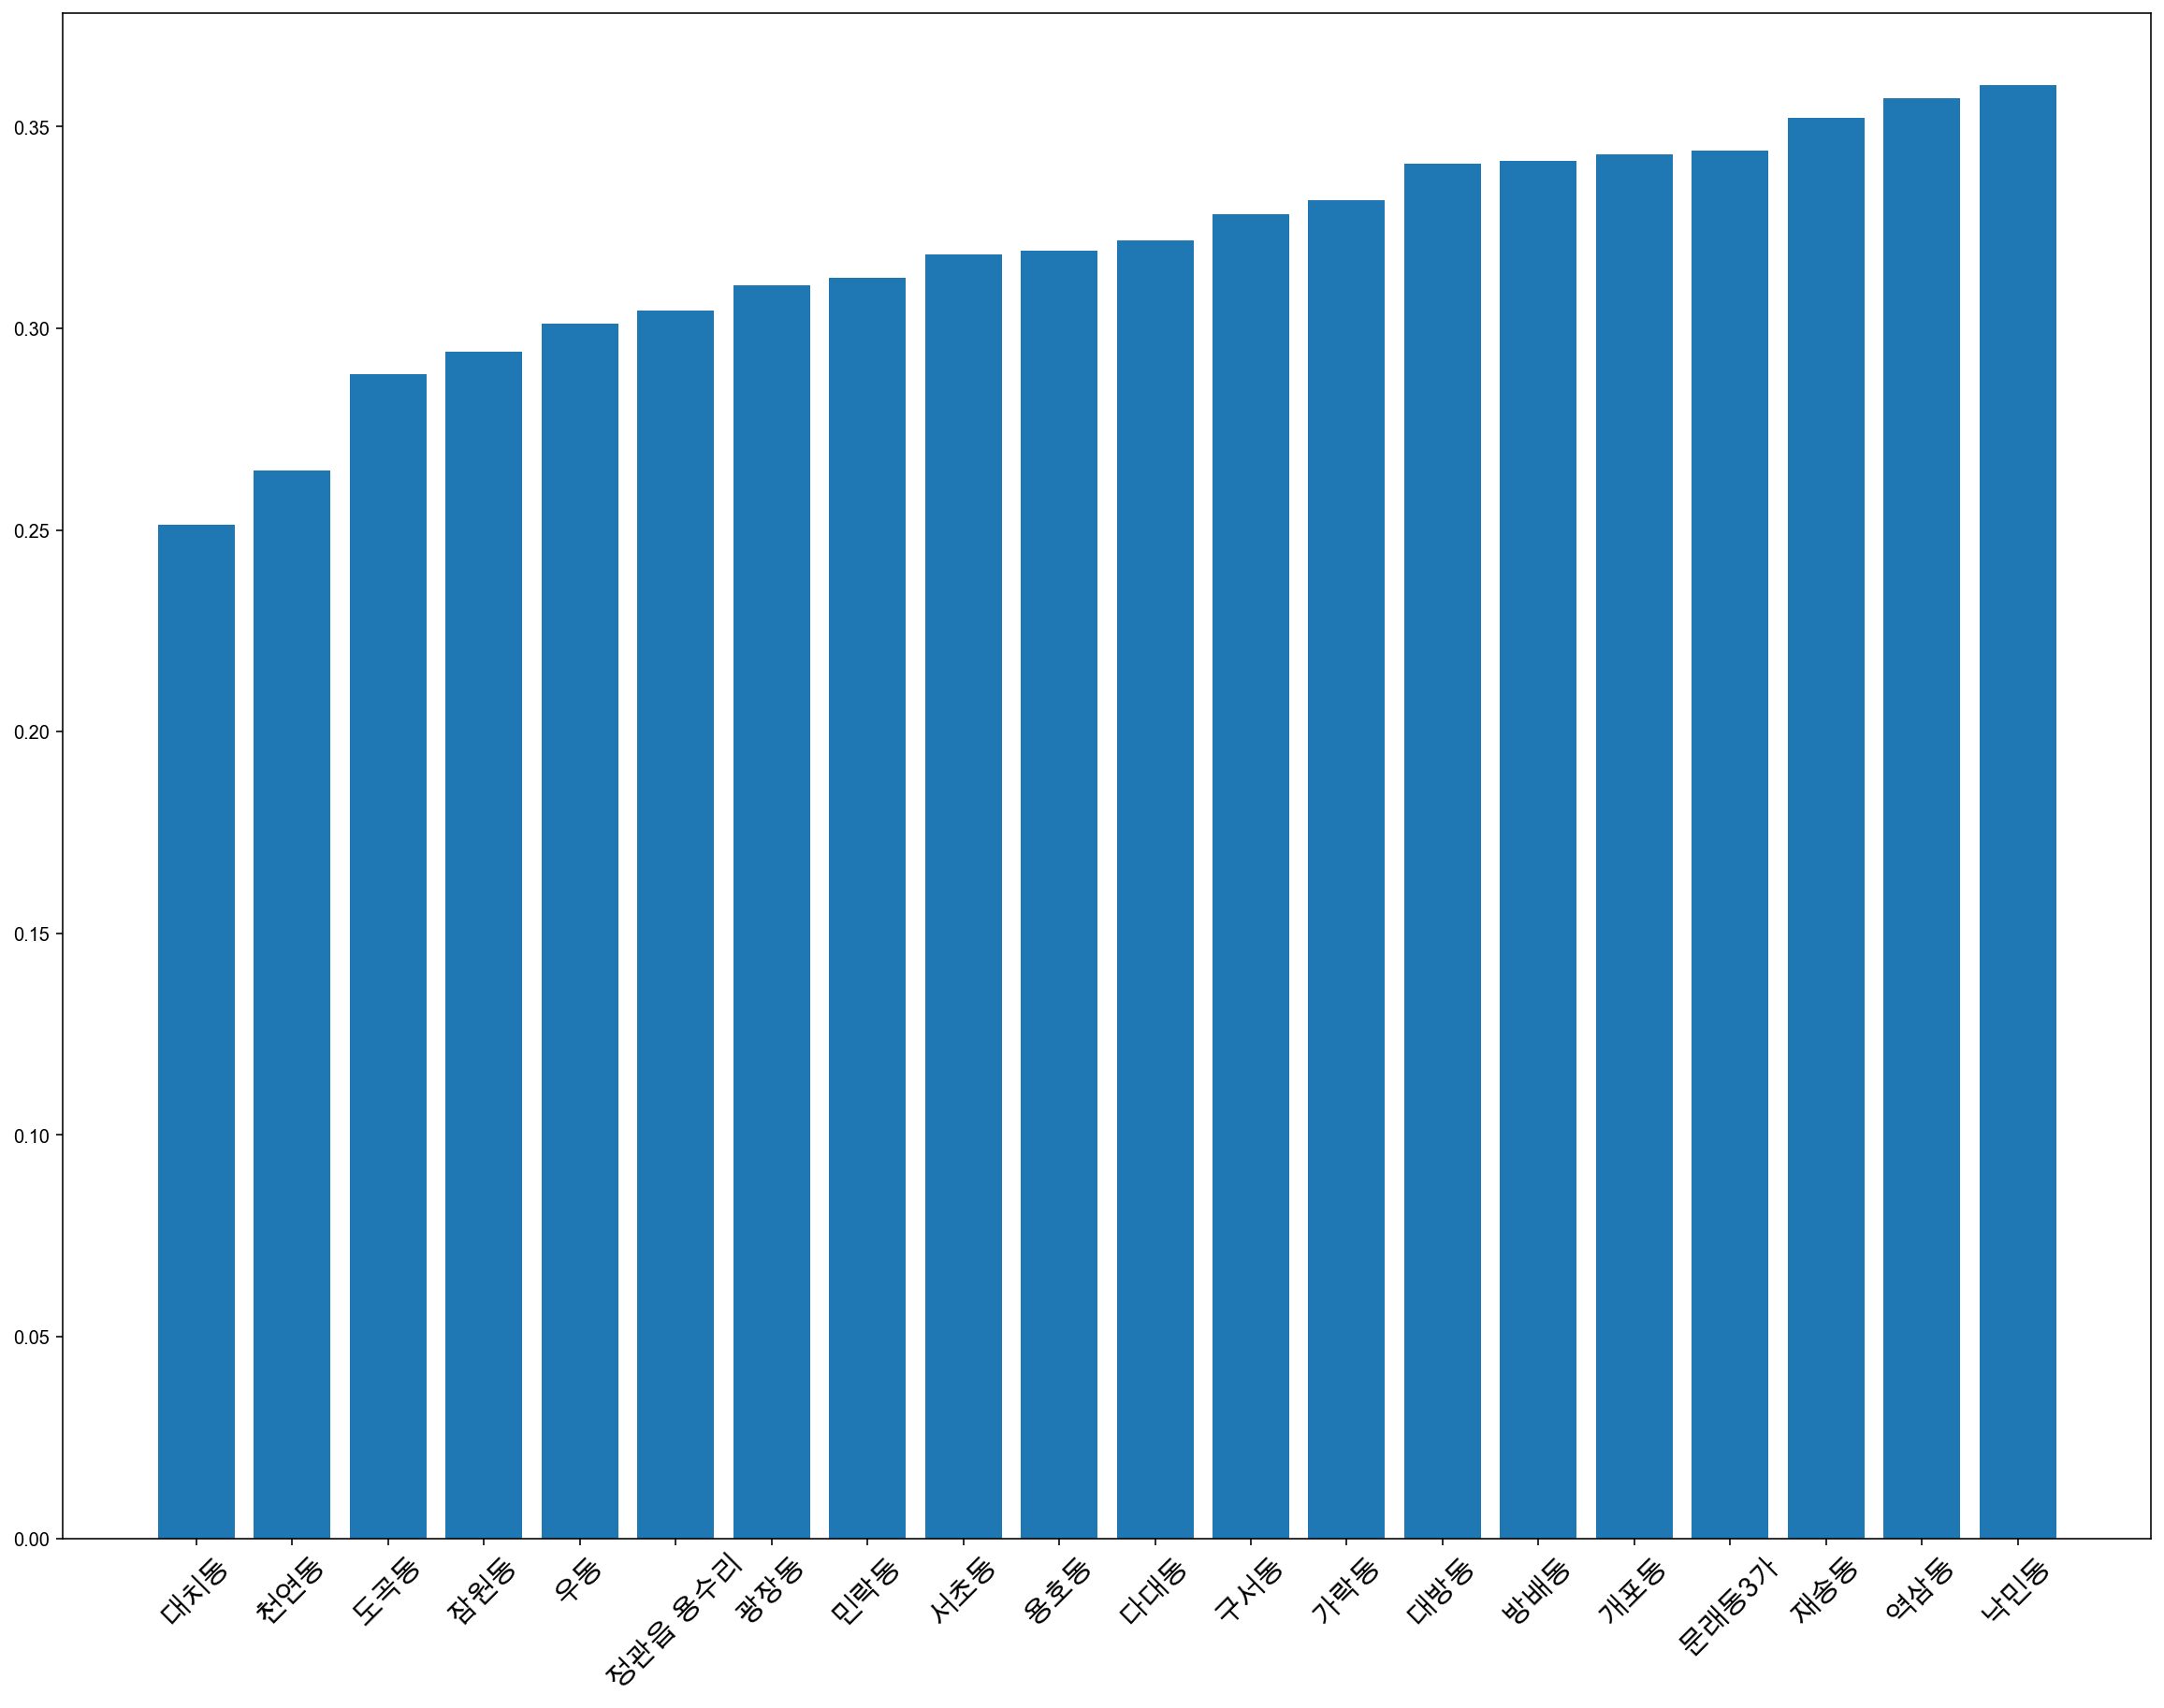

In [32]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

plt.bar(list_sort['dong'], list_sort['max-min'])
plt.xticks(rotation=45, fontsize=15)

plt.show()

In [33]:
s_pivot = pd.pivot_table(df1, index=["city","dong"],values=["transaction_real_price"], aggfunc = ['mean','median','min','max','sum','count'])
s_pivot.xs('서울특별시')

mean                 median                    min  \
     transaction_real_price transaction_real_price transaction_real_price   
dong                                                                        
가락동            54967.955681                54000.0                   1500   
가리봉동           24241.186441                25000.0                  13000   
가산동            26812.244082                27300.0                   8889   
가양동            32263.930082                29000.0                  10000   
갈월동            48662.500000                51500.0                  30000   
...                     ...                    ...                    ...   
효창동            51399.878378                48000.0                  14500   
후암동            49870.036496                45750.0                   8000   
휘경동            34295.183976                34800.0                   9091   
흑석동            63784.781627                64500.0                  16942   
흥인동            74039.456432                79558.0                  13600   

                        max                    sum                  count  
     transaction_real_price transaction_real_price transaction_real_price  
dong                                                                       
가락동                  131500              525878432                   9567  
가리봉동                  32300                1430230                     59  
가산동                   58450               32844999                   1225  
가양동                  115000              213651745                   6622  
갈월동                   63000                 389300                      8  
...                     ...                    ...                    ...  
효창동                  123000               22821546                    444  
후암동                  120000               13664390                    274  
휘경동                   64500               92459816                   2696  
흑석동                  294994              163863104                   2569  
흥인동                  228977               17843509                    241  

[330 rows x 6 columns]

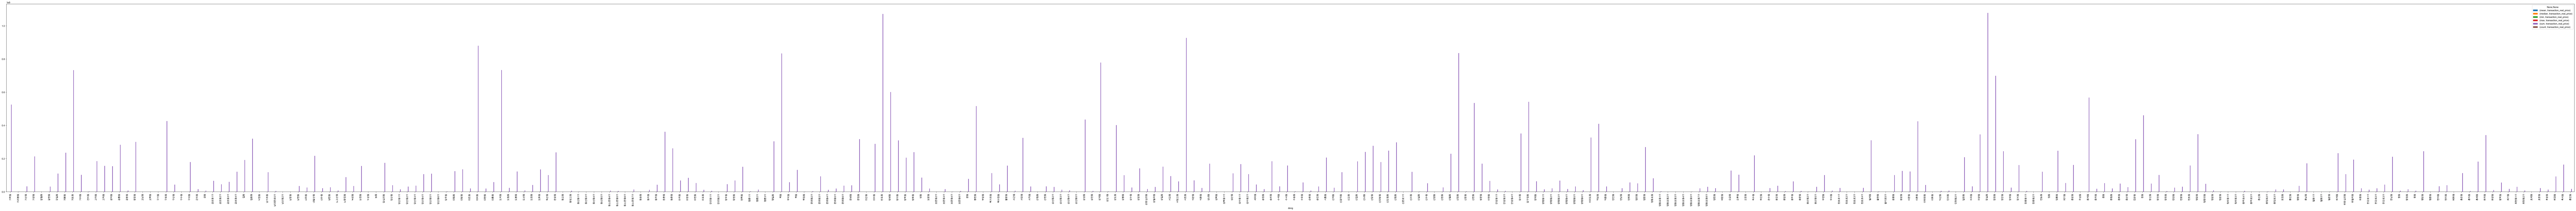

In [34]:
s_pivot.xs('서울특별시').plot(kind='bar', figsize=(200,15))
plt.show()

No handles with labels found to put in legend.


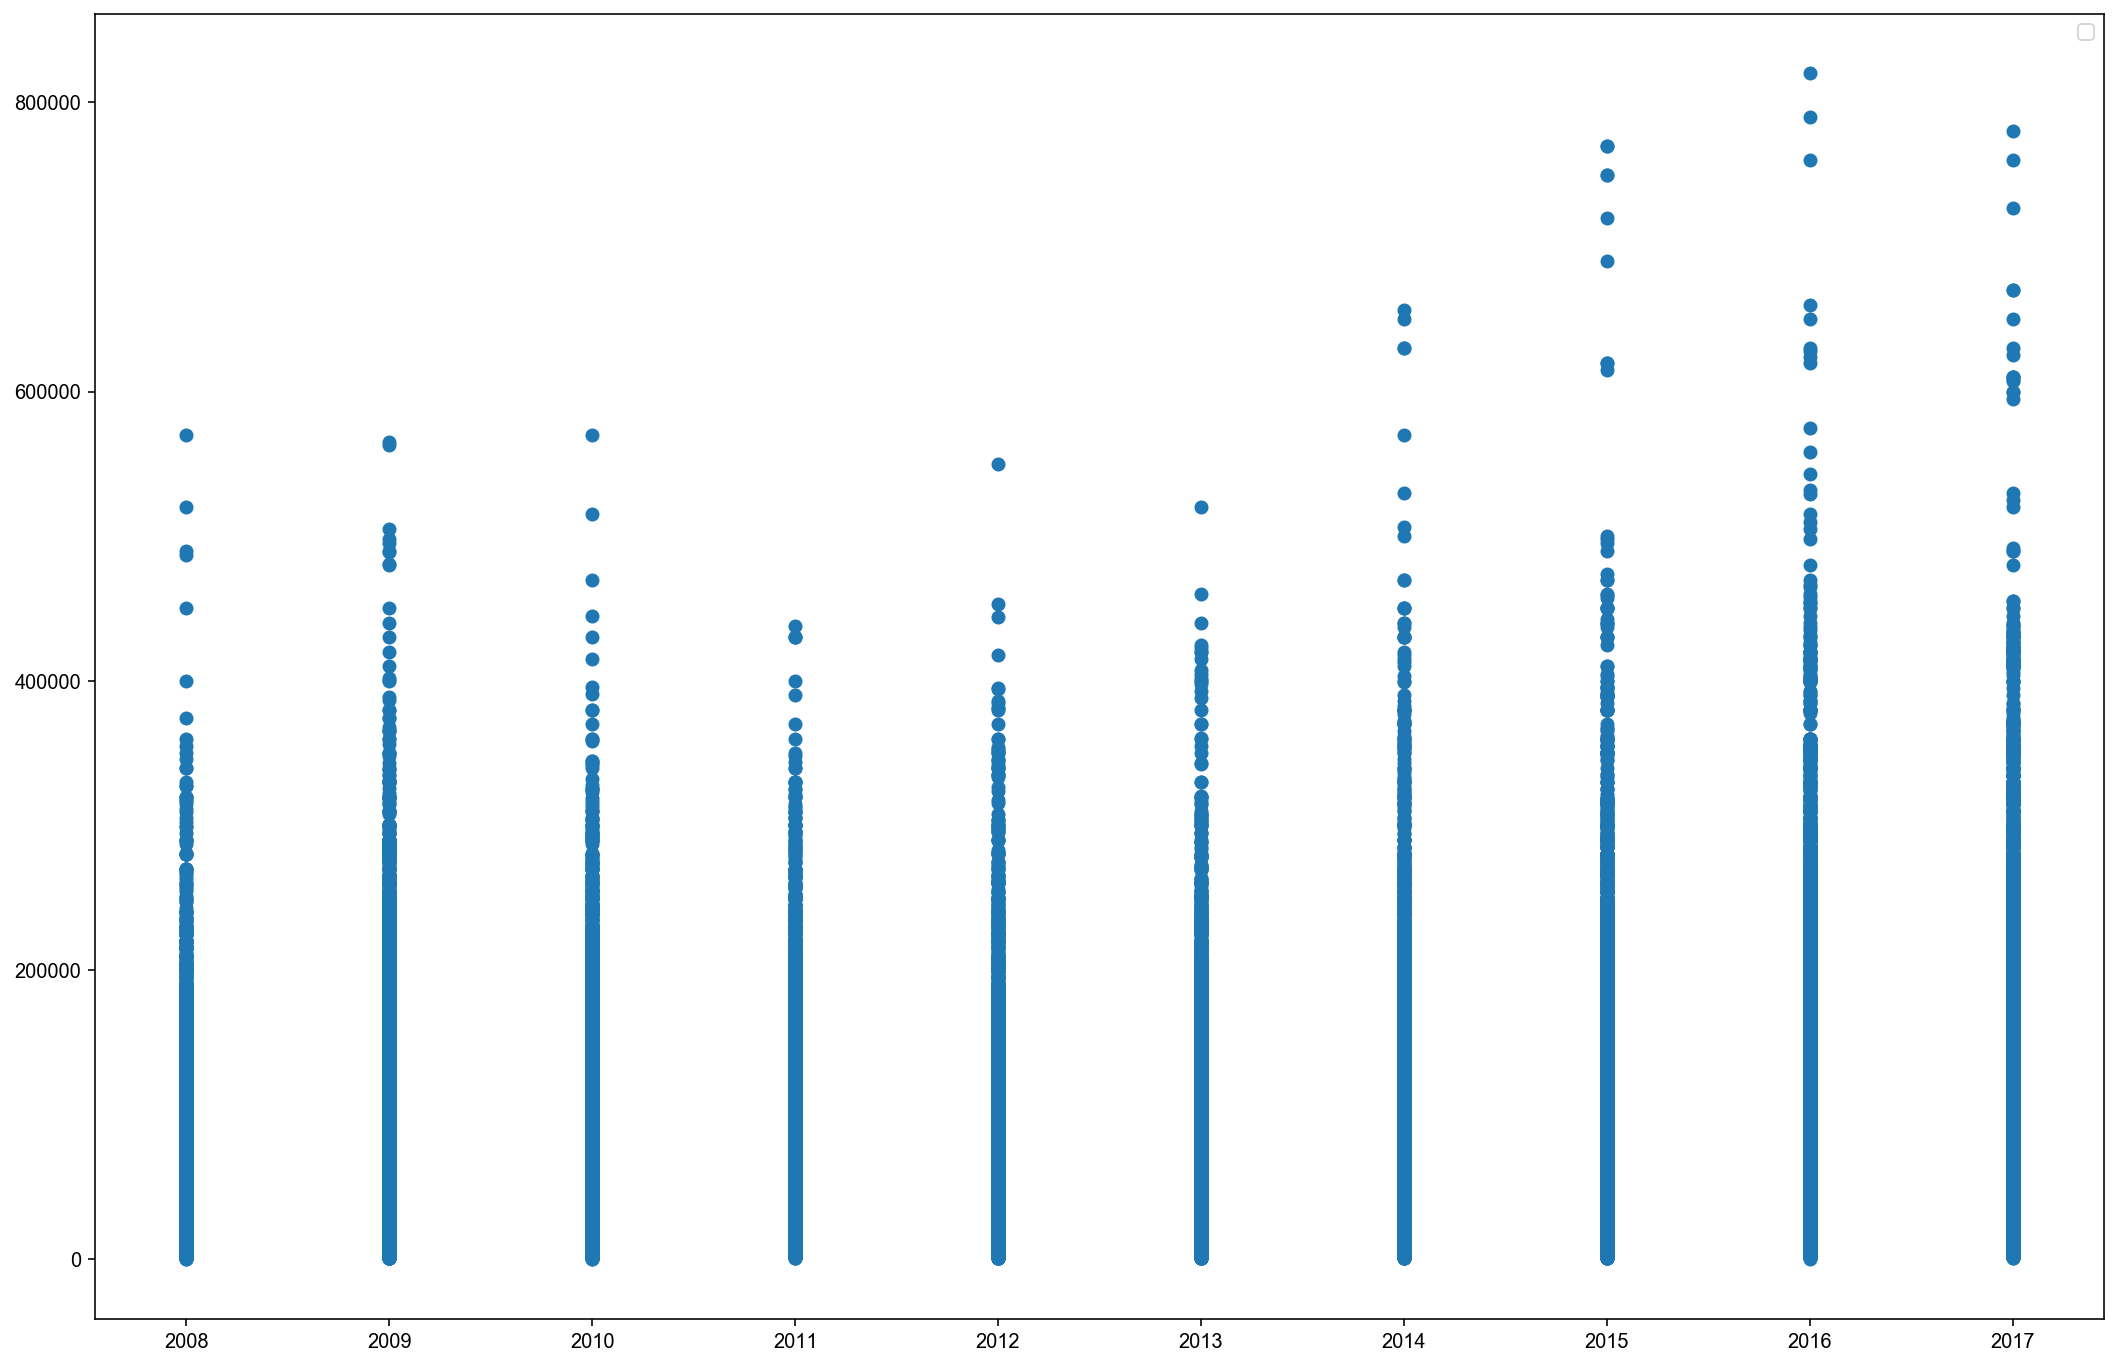

In [43]:
plt.figure(figsize=(18,12))

plt.scatter(df1['year'],df1['transaction_real_price'])

plt.legend()
plt.show()

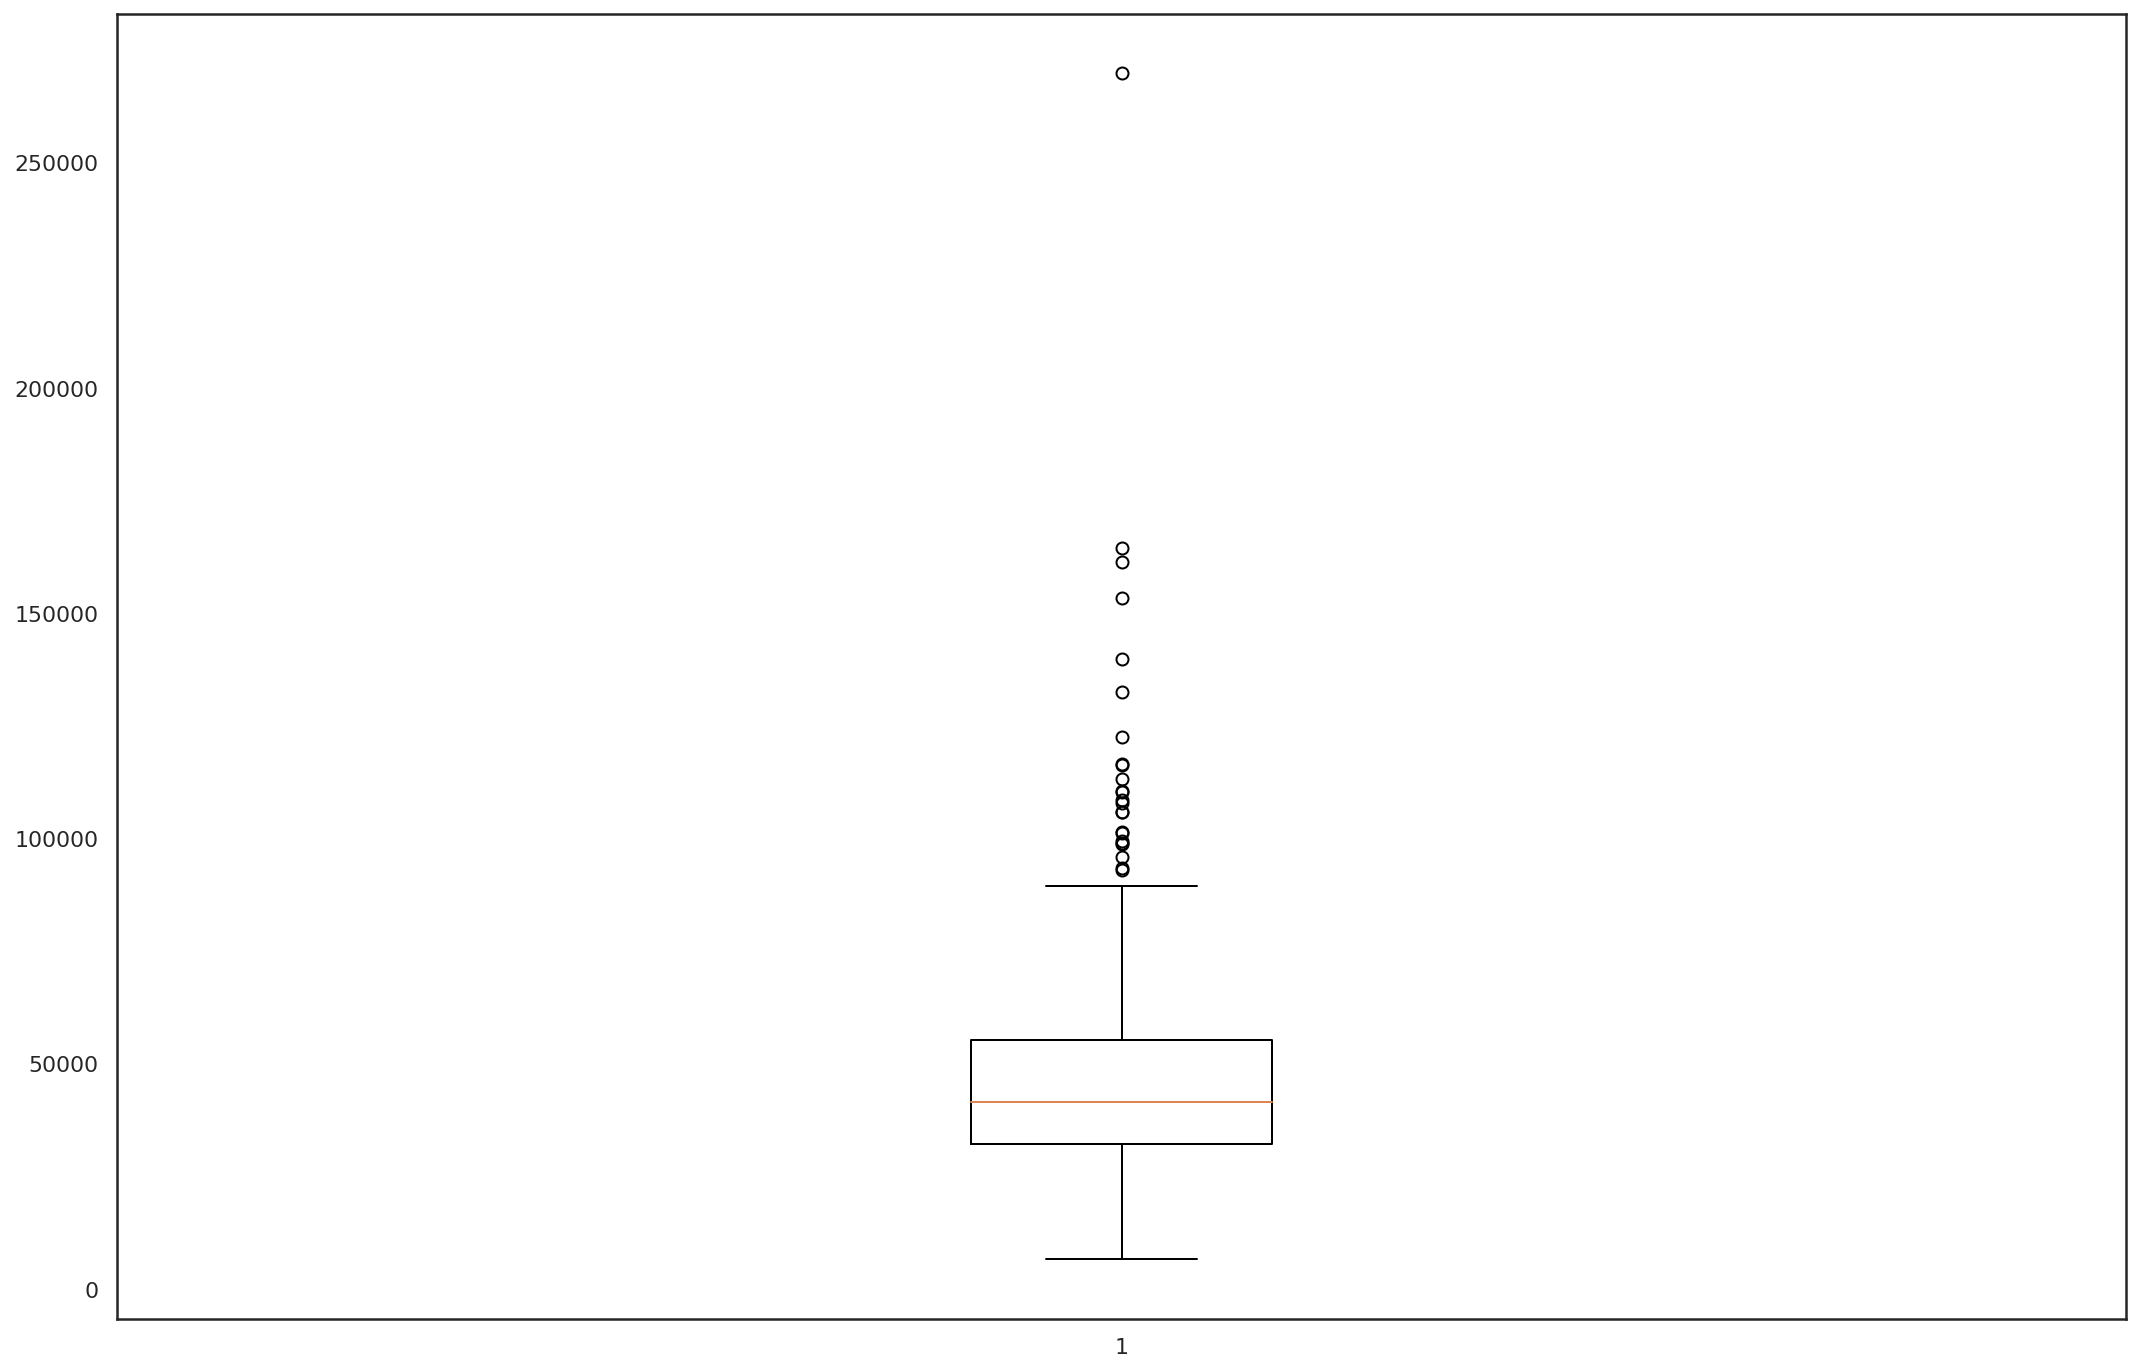

In [26]:
plt.figure(figsize=(18,12))
plt.boxplot(s_pivot.xs('서울특별시')["mean"])
plt.show()

 <img src="./datas/pieris.png" style="width:30%;">

## 동별 아파트 가격에 대한 대략적인 시각화

In [44]:
groupby_min = pd.DataFrame(df1.groupby("dong").transaction_real_price.min())
groupby_min.rename(columns={'transaction_real_price' : 'min'}, inplace=True)

In [45]:
groupby_max = pd.DataFrame(df1.groupby("dong").transaction_real_price.max())
groupby_max.rename(columns={'transaction_real_price' : 'max'}, inplace=True)

In [46]:
groupby_mean = pd.DataFrame(df1.groupby("dong").transaction_real_price.mean())
groupby_mean.rename(columns={'transaction_real_price' : 'mean'}, inplace=True)

In [47]:
groupby_std = pd.DataFrame(df1.groupby("dong").transaction_real_price.std())
groupby_std.rename(columns={'transaction_real_price' : 'std'}, inplace=True)

In [48]:
groupby_count = pd.DataFrame(df1.groupby("dong").transaction_real_price.count())

In [49]:
groupby_df1 = pd.concat([groupby_max, groupby_mean, groupby_min], axis=1)

In [50]:
groupby_df1['count'] = groupby_count

In [51]:
groupby_df1['Score_squareroot']=np.sqrt((groupby_df1['count']))

In [52]:
groupby_std = pd.DataFrame(df1.groupby("dong").transaction_real_price.std())
groupby_std.rename(columns={'transaction_real_price' : 'std'}, inplace=True)

In [53]:
groupby_df1['Score_squareroot']=np.sqrt((groupby_df1['count']))

In [54]:
groupby_df1 = pd.concat([groupby_max, groupby_mean, groupby_min, groupby_std], axis=1)

In [55]:
groupby_df1['sort'] = groupby_df1['max'] - groupby_df1['min']

In [56]:
groupby_count = pd.DataFrame(df1.groupby("dong").transaction_real_price.count())

In [57]:
groupby_df1['count'] = groupby_count
groupby_df1['Score_squareroot']=np.sqrt((groupby_df1['count']))

In [58]:
low = groupby_df1['mean'] - 1.96 * (groupby_df1['std']/(groupby_df1['Score_squareroot']))
high = groupby_df1['mean'] + 1.96 * (groupby_df1['std']/(groupby_df1['Score_squareroot']))

In [59]:
low_95 = pd.DataFrame(low)
high_95 = pd.DataFrame(high)

In [60]:
groupby_df1['low']=low_95
groupby_df1['high']=high_95

In [61]:
groupby_df1

max          mean    min           std    sort  count  \
dong                                                             
가락동   131500  54967.955681   1500  14630.303821  130000   9567   
가리봉동   32300  24241.186441  13000   3896.735630   19300     59   
가산동    58450  26812.244082   8889   9981.864532   49561   1225   
가야동    52500  20207.466579   2200  10164.129646   50300   3785   
가양동   115000  32263.930082  10000  14627.605091  105000   6622   
...      ...           ...    ...           ...     ...    ...   
효창동   123000  51399.878378  14500  18028.839663  108500    444   
후암동   120000  49870.036496   8000  20119.032876  112000    274   
휘경동    64500  34295.183976   9091  10218.115117   55409   2696   
흑석동   294994  63784.781627  16942  23233.503037  278052   2569   
흥인동   228977  74039.456432  13600  39864.459966  215377    241   

      Score_squareroot           low          high  
dong                                                
가락동          97.811042  54674.784329  55261.127033  
가리봉동          7.681146  23246.855375  25235.517506  
가산동          35.000000  26253.259668  27371.228495  
가야동          61.522354  19883.654291  20531.278867  
가양동          81.375672  31911.612180  32616.247983  
...                ...           ...           ...  
효창동          21.071308  49722.881081  53076.875676  
후암동          16.552945  47487.783454  52252.289539  
휘경동          51.923020  33909.468630  34680.899323  
흑석동          50.685304  62886.342381  64683.220873  
흥인동          15.524175  69006.381047  79072.531816  

[473 rows x 9 columns]

In [62]:
groupby_df1.sort_values(by = 'sort', inplace=True)

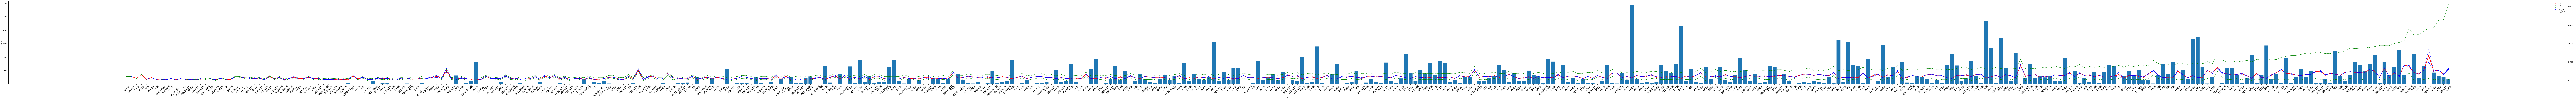

In [64]:
X = groupby_df1.index
y = groupby_df1

fig, ax1 = plt.subplots(figsize=(300,10))

fig.set_facecolor('white')

plt.xticks(rotation=45, fontsize=15)
ax1.set_xlabel('동')
ax1.set_ylabel('Count')
ax2 = ax1.twinx()
ax2.set_ylabel('Price')


ax2.plot(X, y['mean'],label='mean', color='r', marker='o',linewidth=3)
ax2.plot(X, y['max'], label='max', color='g', marker='*',linewidth=1)
ax2.plot(X, y['min'], label='min', color='g', marker='*',linewidth=1)
ax2.plot(X, y['low'], label='low_95%', color='b', marker='*',linewidth=1)
ax2.plot(X, y['high'], label='high_95%', color='b', marker='*',linewidth=1)
ax1.bar(X, y['count'])

plt.legend()

plt.show()

In [49]:
#신뢰구간 95%를 설정해 동별 가격을 보았을때 2곳에서 신뢰구간이 포함이 되지 않음을 발견했다.

In [50]:
groupby_df1.loc["주성동"].reset_index()

index            주성동
0               max  117000.000000
1              mean  106000.000000
2               min   95000.000000
3               std   15556.349186
4              sort   22000.000000
5             count       2.000000
6  Score_squareroot       1.414214
7               low   84440.000000
8              high  127560.000000

In [51]:
(groupby_df1.loc["주성동"]['max'])-(groupby_df1.loc["주성동"]['min']) > (groupby_df1.loc["주성동"]['high'])-(groupby_df1.loc["주성동"]['low'])

False

In [52]:
groupby_df1.loc["교남동"].reset_index()

index            교남동
0               max  124500.000000
1              mean  108600.000000
2               min   96500.000000
3               std   14381.585448
4              sort   28000.000000
5             count       3.000000
6  Score_squareroot       1.732051
7               low   92325.704030
8              high  124874.295970

In [53]:
(groupby_df1.loc["교남동"]['max'])-(groupby_df1.loc["교남동"]['min']) > (groupby_df1.loc["교남동"]['high'])-(groupby_df1.loc["교남동"]['low'])

False

# 새로운 변수를 추가해보자

## 공원 Data

In [54]:
park.tail() #train data와  park data는 시와 동을 엮어 분석을 진행할 예정이다.

city   gu dong  park_name park_type  park_area park_exercise_facility  \
1354  서울특별시  구로구  천왕동  이펜시아어린이공원     어린이공원     1500.0                    NaN   
1355  서울특별시  구로구  천왕동      개명소공원       소공원     5415.0                    NaN   
1356  서울특별시  구로구  천왕동    봉화대근린공원      근린공원    60975.0                    NaN   
1357  서울특별시  구로구   항동      푸른수목원      근린공원   100809.0                    NaN   
1358  서울특별시  구로구  오류동   오류동역문화공원      문화공원     7510.0                    NaN   

     park_entertainment_facility park_benefit_facility park_cultural_facitiy  \
1354                     조합놀이 1기                   NaN                   NaN   
1355                         NaN                   NaN                   NaN   
1356                         NaN                   NaN                   NaN   
1357                         NaN                   NaN                   NaN   
1358                         NaN                   NaN                   NaN   

     park_facility_other  park_open_year reference_date  
1354                 NaN          2006.0     2019-02-25  
1355                 NaN          2006.0     2019-02-25  
1356                 NaN          2006.0     2019-02-25  
1357                 NaN          2005.0     2019-02-25  
1358                 NaN          2013.0     2019-02-25

In [55]:
park.info() # 공원 Datad에 null 값이 많다. 대략적으로 보니 각 공원별로 장비의 유무를 나타내는 것 같다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

In [56]:
park_df = pd.DataFrame(park, columns=["city","gu","dong","park_name","park_type","park_area","park_exercise_facility",
                                      "park_entertainment_facility","park_benefit_facility","park_cultural_facitiy","park_facility_other","park_open_year","reference_date"])
park_df.tail()

city   gu dong  park_name park_type  park_area park_exercise_facility  \
1354  서울특별시  구로구  천왕동  이펜시아어린이공원     어린이공원     1500.0                    NaN   
1355  서울특별시  구로구  천왕동      개명소공원       소공원     5415.0                    NaN   
1356  서울특별시  구로구  천왕동    봉화대근린공원      근린공원    60975.0                    NaN   
1357  서울특별시  구로구   항동      푸른수목원      근린공원   100809.0                    NaN   
1358  서울특별시  구로구  오류동   오류동역문화공원      문화공원     7510.0                    NaN   

     park_entertainment_facility park_benefit_facility park_cultural_facitiy  \
1354                     조합놀이 1기                   NaN                   NaN   
1355                         NaN                   NaN                   NaN   
1356                         NaN                   NaN                   NaN   
1357                         NaN                   NaN                   NaN   
1358                         NaN                   NaN                   NaN   

     park_facility_other  park_open_year reference_date  
1354                 NaN          2006.0     2019-02-25  
1355                 NaN          2006.0     2019-02-25  
1356                 NaN          2006.0     2019-02-25  
1357                 NaN          2005.0     2019-02-25  
1358                 NaN          2013.0     2019-02-25

In [57]:
park_rank = (park_df.groupby('dong')['park_area'].agg(['sum'])).sort_values(by='sum', ascending=False)
park_rank.head(10)

sum
dong             
초읍동     9956116.3
상계동     6692795.0
온천동     6346071.7
중계동     5334267.0
영주동     5249896.0
진관동     2956693.3
면목동     2801845.8
장전동     2332959.4
서대신동3가  2104835.0
용호동     1962663.0

In [58]:
# 새로운 x 값이 생겼다. 집값과의 상관관계를 밝혀보자

In [59]:
pd.pivot_table(park_df, index='dong',aggfunc="sum")[['park_area']].reset_index()

dong  park_area
0    가락동   102882.4
1    가산동     3650.6
2    가야동    72762.0
3    가양동   228304.5
4    갈현동     8312.8
..   ...        ...
232  회동동     9189.2
233  효창동   171802.0
234  후암동     2522.0
235  휘경동     6965.9
236  흑석동     2899.7

[237 rows x 2 columns]

In [60]:
park_count = park_df.groupby(['dong'])["park_area"].count().reset_index()

In [61]:
corr_park_count = pd.merge(park_count, df1)

In [62]:
park_sum = pd.merge(pd.pivot_table(park_df, index='dong')[['park_area']].reset_index(), df1)

In [110]:
# 동별 공원의 넓이 합과 집값의 상관관계를 보자

In [63]:
np.corrcoef(park_sum['park_area'], park_sum['transaction_real_price'])[0,1]

-0.074567797760041

In [111]:
# 동별 공원의 수와 집값의 상관관계를 보자

In [64]:
np.corrcoef(corr_park_count['park_area'], corr_park_count['transaction_real_price'])[0,1]

0.09527464647645059

# 회귀분석을 해보자

## 지금까지의 회귀분석 모델의 결과
 - x1 : exclusive_use_area, x2 : year_of_completion, x3 : floor,
    - score =  0.3194554604195421
    - Mean_Squared_Error =  656071224.025548
    - RMSE =  25613.88732749381

 - x1 : exclusive_use_area, x2 : year_of_completion, x3 : floor, x4 : dong
    - score =  0.753000279857136
    - Mean_Squared_Error =  238117271.24869266
    - RMSE =  15431.04893546426

In [68]:
from sklearn import linear_model
import StrReg

## 계산해보자

### Train 데이터만으로 계산 
 - 계속 반복되는 계산을 클래스로 만들었다.

In [69]:
train = pd.read_csv('datas/train.csv')

In [70]:
train.head(1)

transaction_id  apartment_id   city dong jibun       apt  \
0               0          7622  서울특별시  신교동  6-13  신현(101동)   

             addr_kr  exclusive_use_area  year_of_completion  \
0  신교동 6-13 신현(101동)               84.82                2002   

   transaction_year_month transaction_date  floor  transaction_real_price  
0                  200801            21~31      2                   37500

In [71]:
reg = StrReg.StrReg()

In [72]:
reg.linear_regression_fit(['exclusive_use_area', 'floor'], ['dong', 'apartment_id'], 'transaction_real_price', train)

LinearRegression()

In [73]:
prediction = reg.linear_regression_predict(train)

In [74]:
y = train['transaction_real_price']

In [75]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     1.844077e-12
std      1.041590e+04
min     -1.922415e+05
25%     -4.393660e+03
50%     -6.756275e+01
75%      3.928735e+03
max      5.119641e+05
Name: transaction_real_price, dtype: float64

In [76]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.8874621304408613


In [77]:
from sklearn.metrics import mean_squared_error
print('score = ', R_squared)
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.8874621304408613
Mean_Squared_Error =  108490853.3340199
RMSE =  10415.89426472926


In [78]:
linear_regression = reg.linear_regression_fit(['exclusive_use_area', 'floor'], ['dong', 'apartment_id'], 'transaction_real_price', train, True)

In [79]:
prediction = reg.linear_regression_predict(train)

In [80]:
y = train['transaction_real_price']

In [81]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean    -1.958161e-10
std      1.261120e+04
min     -1.240979e+05
25%     -4.675750e+03
50%     -8.299202e+01
75%      4.670732e+03
max      5.966916e+05
Name: transaction_real_price, dtype: float64

In [82]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.8350249262048433


In [83]:
from sklearn.metrics import mean_squared_error
print('score = ', R_squared)
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.8350249262048433
Mean_Squared_Error =  159042343.74611032
RMSE =  12611.199139895869


In [84]:
reg.linear_regression_fit(['exclusive_use_area', 'floor'], ['dong', 'apartment_id', 'transaction_year_month'], 'transaction_real_price', train)

LinearRegression()

In [85]:
prediction = reg.linear_regression_predict(train)

In [86]:
y = train['transaction_real_price']

In [87]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean    -1.650291e-11
std      9.805467e+03
min     -1.865398e+05
25%     -3.753277e+03
50%     -1.855899e+02
75%      3.341341e+03
max      5.141403e+05
Name: transaction_real_price, dtype: float64

In [88]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.9002663317728773


In [89]:
from sklearn.metrics import mean_squared_error
print('score = ', R_squared)
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.9002663317728773
Mean_Squared_Error =  96147108.65311489
RMSE =  9805.463204413898


In [90]:
reg.linear_regression_fit(['exclusive_use_area', 'floor'], ['dong', 'apartment_id', 'transaction_year_month'], 'transaction_real_price', train, 'exclusive_use_area')

LinearRegression()

In [91]:
prediction = reg.linear_regression_predict(train)

In [92]:
y = train['transaction_real_price']

In [93]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean    -1.203573e-11
std      1.218336e+04
min     -1.202068e+05
25%     -4.166532e+03
50%     -8.397262e+01
75%      4.131636e+03
max      5.978854e+05
Name: transaction_real_price, dtype: float64

In [94]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.8460287640742244


In [95]:
from sklearn.metrics import mean_squared_error
print('score = ', R_squared)
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.8460287640742244
Mean_Squared_Error =  148434218.98708406
RMSE =  12183.358280338145


### Park데이터 추가

In [96]:
park_df = pd.DataFrame(pd.read_csv('datas/park.csv'))

In [97]:
area = pd.pivot_table(park_df, index='dong',aggfunc="sum")[['park_area']].reset_index()

In [98]:
count = pd.pivot_table(park_df, index='dong',aggfunc="count")[['park_area']].reset_index()

In [99]:
count.rename(columns={'park_area' : 'park_count'}, inplace=True)

In [100]:
park_df = pd.merge(area, count)

In [101]:
train = pd.merge(train ,park_df)

In [102]:
train.head(1)

transaction_id  apartment_id   city  dong jibun   apt         addr_kr  \
0              11          7808  서울특별시  명륜1가  45-5  아마레스  명륜1가 45-5 아마레스   

   exclusive_use_area  year_of_completion  transaction_year_month  \
0               84.59                2002                  200801   

  transaction_date  floor  transaction_real_price  park_area  park_count  
0             1~10      1                   30400     1149.5           1

In [103]:
reg.linear_regression_fit(['exclusive_use_area', 'floor', 'park_area', 'park_count'], ['dong', 'apartment_id', 'transaction_year_month'], 'transaction_real_price', train)

LinearRegression()

In [104]:
prediction = reg.linear_regression_predict(train)

In [105]:
y = train['transaction_real_price']

In [106]:
residuals = y-prediction
residuals.describe()

count    9.525760e+05
mean    -4.143787e-12
std      1.040958e+04
min     -1.878745e+05
25%     -3.876777e+03
50%     -1.527318e+02
75%      3.457916e+03
max      5.125607e+05
Name: transaction_real_price, dtype: float64

In [107]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.9003701677303142


In [108]:
from sklearn.metrics import mean_squared_error
print('score = ', R_squared)
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.9003701677303142
Mean_Squared_Error =  108359138.68998289
RMSE =  10409.569572752895


 <img src="./datas/dacon.png" style="width:150%;">

# 이후 목표

 <img src="./datas/csv.png" style="width:100%;">

 <img src="./datas/sgis.png" style="width:100%;">

 <img src="./datas/sdc.png" style="width:100%;">

 <img src="./datas/bdc.png" style="width:100%;">